# HR Analysis
## data: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
### 차은서가 맡은 부분
* **(교육) Education, EducationField, TrainingTimesLastYear**
⇒ 교육 수준이 높을수록 퇴사를 많이할까? 교육수준이 높은, 잘 훈련된 직원 이탈을 막으려면 인사팀은 어떤 해결책을 제시할 수 있을까? (석박사급 직원들이 회사에서 원하는 것은 뭘까?)

* **(직무) Department, JobRole, JobSatisfaction, StandardHours(애매), BusinessTravel, Education**
⇒ 직무별 특징이 퇴사율에 영향을 미칠까? 퇴사가 많이 일어나는 직무는 왜 그럴까? 인사팀은 이 문제를 어떻게 해결할 수 있을까?, 직무별 퇴사율 높은 직무와 그 이유 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

# 컬럼 출력 생략 해제
pd.set_option('display.max_columns', None)

In [3]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/JounKK/AIS8_Final_HRA/main/dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv', index_col='EmployeeNumber')
df_raw

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
2062,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
2064,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3


In [4]:
df_raw.shape

(1470, 34)

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [6]:
df_raw.duplicated().sum()

0

In [16]:
# 불필요해보이는 컬럼 제거
df_raw = df_raw.drop(columns=["Over18", "EmployeeCount", "StandardHours", "DailyRate", "HourlyRate", "MonthlyRate"], axis=1)
df_raw

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,2,Medical,3,Male,4,2,Laboratory Technician,4,Married,2571,4,No,17,3,3,1,17,3,3,5,2,0,3
2062,39,No,Travel_Rarely,Research & Development,6,1,Medical,4,Male,2,3,Healthcare Representative,1,Married,9991,4,No,15,3,1,1,9,5,3,7,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2,Male,4,2,Manufacturing Director,2,Married,6142,1,Yes,20,4,2,1,6,0,3,6,2,0,3


In [ ]:
# 전체 파일에서 내가 분석할 때 필요해보이는 데이터만 추출
# JobRole 직무역할, YearsSinceLastPromotion 마지막 승진 이후 근무기간
# df_jobedu = df[['JobLevel', 'JobSatisfaction', 'StandardHours', 'BusinessTravel', 'Education', 'EducationField', 'TrainingTimesLastYear', 'Age', 'Attrition', 'WorkLifeBalance', 'Department', 'EnvironmentSatisfaction', 'StandardHours', 'YearsWithCurrManager', 'JobRole', 'YearsSinceLastPromotion']]
# df_jobedu

## 부서는 총 Sales, RnD, HR로 구성되어 있고, 각 부서에 JobRole이 다름을 시각화

In [76]:
df_raw['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

<AxesSubplot:title={'center':'회사 내 부서'}>

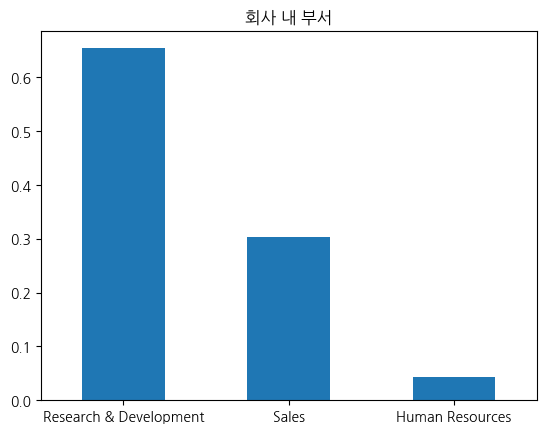

In [33]:
df_raw['Department'].value_counts(1).plot.bar(rot=0, title='회사 내 부서')

<AxesSubplot:title={'center':'부서 내 역할'}>

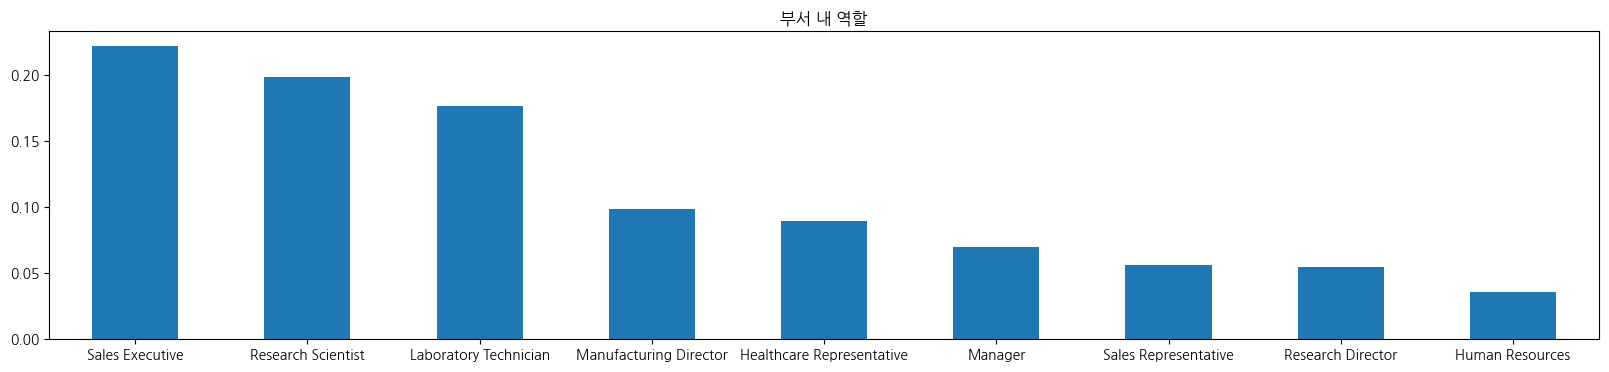

In [34]:
df_raw['JobRole'].value_counts(1).plot.bar(rot=0, figsize=(20,4), title='부서 내 역할')

<AxesSubplot:xlabel='JobRole', ylabel='count'>

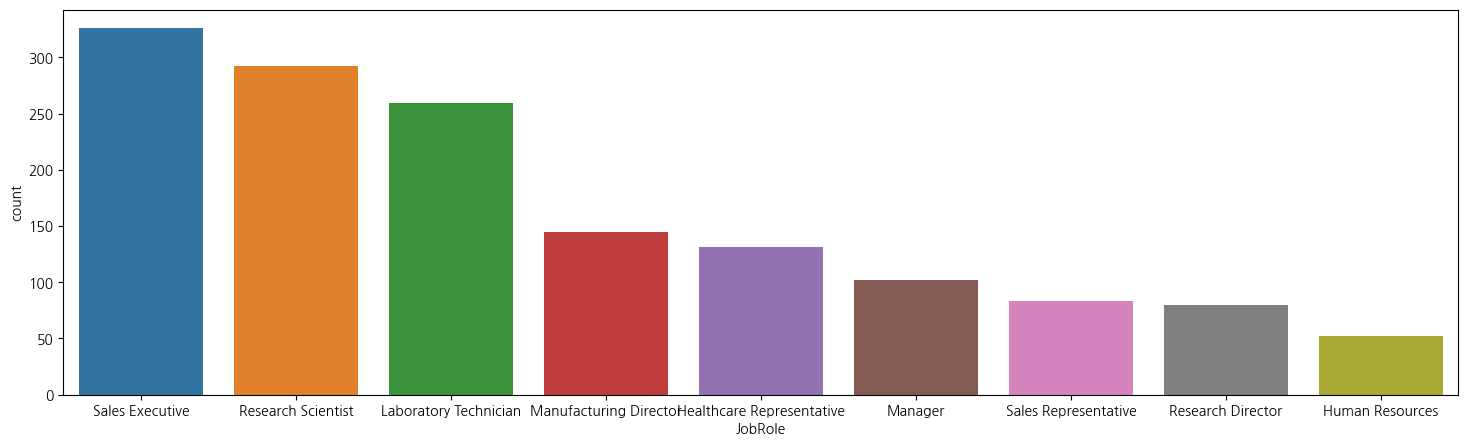

In [180]:
#  위에거랑 같은 것
plt.figure(figsize = [18,5])
sns.countplot(data=df_raw, x='JobRole')

In [8]:
df_RnD = df_raw[df_raw['Department']=='Research & Development']
df_RnD

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
8,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2057,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2,Male,74,3,2,Manufacturing Director,1,Single,9936,3787,0,Y,No,19,3,2,80,0,10,2,3,9,4,1,7
2061,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
2062,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7


<AxesSubplot:title={'center':'RnD 부서에서 직무 역할'}>

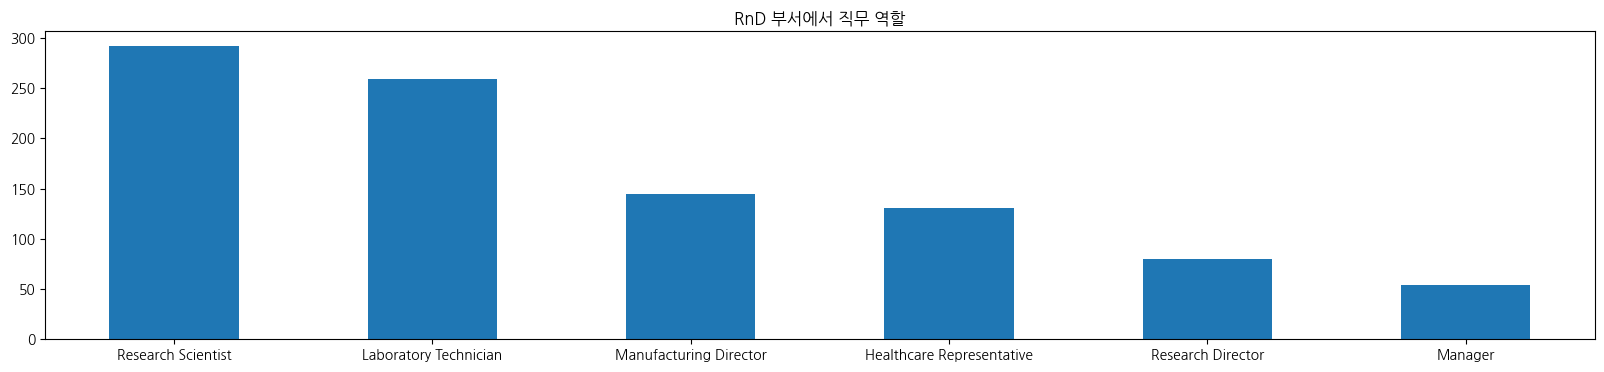

In [98]:
df_RnD['JobRole'].value_counts().plot.bar(rot=0, figsize=(20,4), title='RnD 부서에서 직무 역할')

In [9]:
df_sales = df_raw[df_raw['Department']=='Sales']
df_sales

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
23,53,No,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,1,Female,78,2,4,Manager,4,Married,15427,22021,2,Y,No,16,3,3,80,0,31,3,3,25,8,3,7
27,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,3,Male,82,2,1,Sales Representative,1,Single,3407,6986,7,Y,No,23,4,2,80,0,10,4,3,5,3,0,3
35,42,No,Travel_Rarely,691,Sales,8,4,Marketing,1,3,Male,48,3,2,Sales Executive,2,Married,6825,21173,0,Y,No,11,3,4,80,1,10,2,3,9,7,4,2
38,46,No,Travel_Rarely,705,Sales,2,4,Marketing,1,2,Female,83,3,5,Manager,1,Single,18947,22822,3,Y,No,12,3,4,80,0,22,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,45,No,Travel_Rarely,374,Sales,20,3,Life Sciences,1,4,Female,50,3,2,Sales Executive,3,Single,4850,23333,8,Y,No,15,3,3,80,0,8,3,3,5,3,0,1
2055,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,4,Male,39,2,3,Sales Executive,1,Divorced,10854,16586,4,Y,Yes,13,3,2,80,1,20,3,3,3,2,2,0
2056,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2,Female,60,2,4,Sales Executive,4,Married,12031,8828,0,Y,No,11,3,1,80,1,21,2,2,20,9,9,6


<AxesSubplot:title={'center':'Sales 부서에서 직무 역할'}>

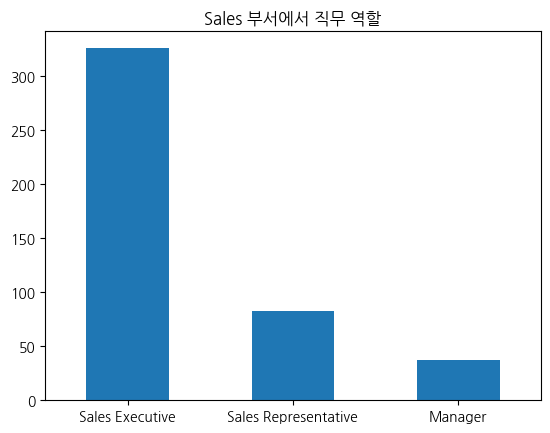

In [99]:
df_sales['JobRole'].value_counts().plot.bar(rot=0, title='Sales 부서에서 직무 역할')

In [10]:
df_hr = df_raw[df_raw['Department']=='Human Resources']
df_hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
103,46,No,Travel_Rarely,945,Human Resources,5,2,Medical,1,2,Male,80,3,2,Human Resources,2,Divorced,5021,10425,8,Y,Yes,22,4,4,80,1,16,2,3,4,2,0,2
133,37,Yes,Travel_Rarely,807,Human Resources,6,4,Human Resources,1,3,Male,63,3,1,Human Resources,1,Divorced,2073,23648,4,Y,Yes,22,4,4,80,0,7,3,3,3,2,0,2
140,59,No,Non-Travel,1420,Human Resources,2,4,Human Resources,1,3,Female,32,2,5,Manager,4,Married,18844,21922,9,Y,No,21,4,4,80,1,30,3,3,3,2,2,2
148,54,No,Non-Travel,142,Human Resources,26,3,Human Resources,1,4,Female,30,4,4,Manager,4,Single,17328,13871,2,Y,Yes,12,3,3,80,0,23,3,3,5,3,4,4
177,26,No,Travel_Rarely,1355,Human Resources,25,1,Life Sciences,1,3,Female,61,3,1,Human Resources,3,Married,2942,8916,1,Y,No,23,4,4,80,1,8,3,3,8,7,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,27,Yes,Travel_Frequently,1337,Human Resources,22,3,Human Resources,1,1,Female,58,2,1,Human Resources,2,Married,2863,19555,1,Y,No,12,3,1,80,0,1,2,3,1,0,0,0
1972,38,No,Travel_Frequently,1444,Human Resources,1,4,Other,1,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Y,Yes,11,3,2,80,1,7,2,3,6,2,1,2
1973,55,No,Travel_Rarely,189,Human Resources,26,4,Human Resources,1,3,Male,71,4,5,Manager,2,Married,19636,25811,4,Y,Yes,18,3,1,80,1,35,0,3,10,9,1,4


<AxesSubplot:title={'center':'HR 부서에서 직무 역할'}>

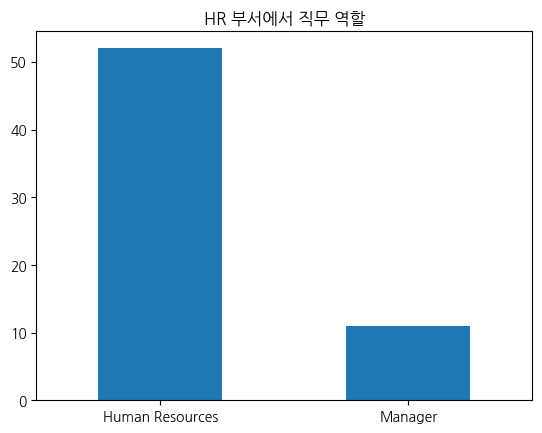

In [100]:
df_hr['JobRole'].value_counts().plot.bar(rot=0, title='HR 부서에서 직무 역할')

## 각 부서별 학력과 전공 알아보자

<AxesSubplot:>

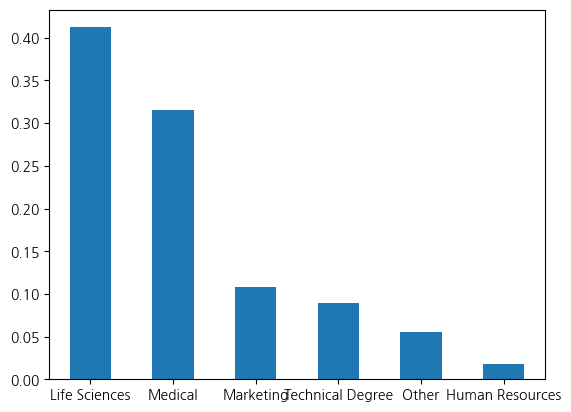

In [35]:
df_raw['EducationField'].value_counts(1).plot.bar(rot=0)

<AxesSubplot:>

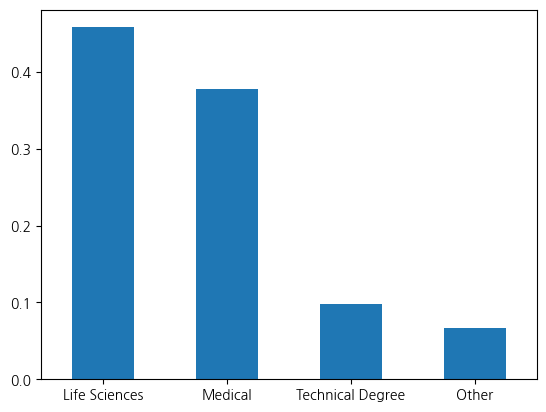

In [37]:

df_RnD['EducationField'].value_counts(1).plot.bar(rot=0)

Text(0.5, 1.0, 'RnD 학력')

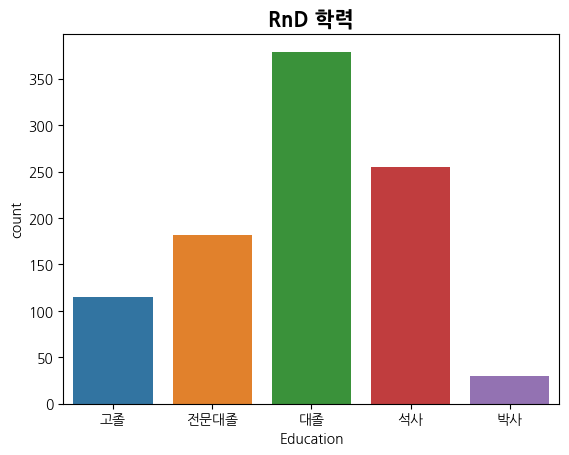

In [107]:
sns.countplot(data = df_RnD, 
              x = 'Education',
#               palette = ['색깔정해서','넣자랏']
             )
plt.xticks(ticks = [0,1,2,3,4], labels = ['고졸','전문대졸','대졸', '석사', '박사'])
plt.title('RnD 학력', weight = 'bold', size = 15)

Text(0.5, 1.0, 'Sales 학력')

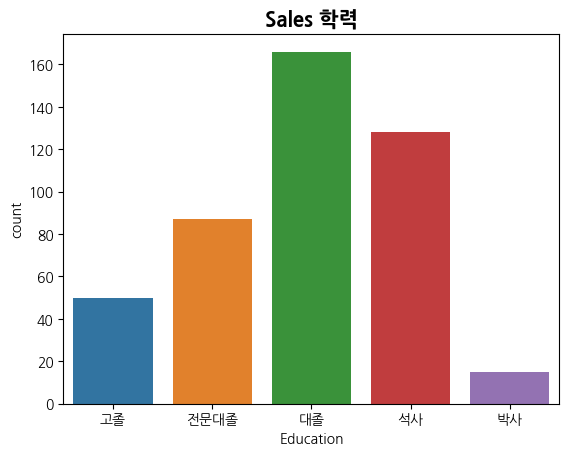

In [110]:
sns.countplot(data = df_sales, 
              x = 'Education',
#               palette = ['색깔정해서','넣자랏']
             )
plt.xticks(ticks = [0,1,2,3,4], labels = ['고졸','전문대졸','대졸', '석사', '박사'])
plt.title('Sales 학력', weight = 'bold', size = 15)

Text(0.5, 1.0, 'HR 학력')

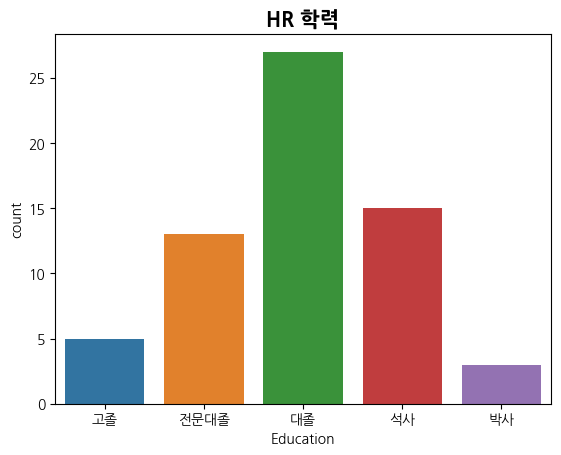

In [111]:
sns.countplot(data = df_hr, 
              x = 'Education',
#               palette = ['색깔정해서','넣자랏']
             )
plt.xticks(ticks = [0,1,2,3,4], labels = ['고졸','전문대졸','대졸', '석사', '박사'])
plt.title('HR 학력', weight = 'bold', size = 15)

## 부서별 Business Travel 정도
* 만들어진 데이터란 그런지,,,, 출장빈도가 비슷함!!

<AxesSubplot:title={'center':'RnD 출장 정도'}>

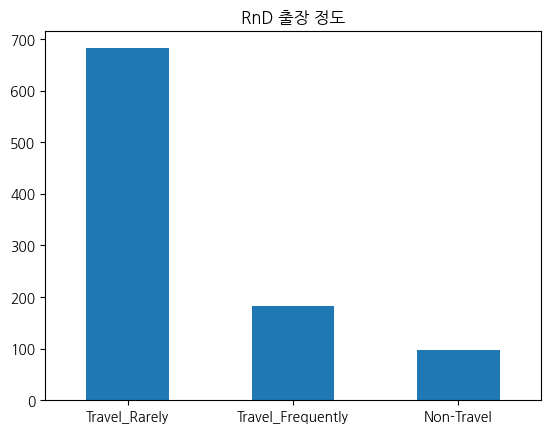

In [41]:

df_RnD['BusinessTravel'].value_counts().plot.bar(rot=0, title='RnD 출장 정도')


<AxesSubplot:title={'center':'Sales 출장 정도'}>

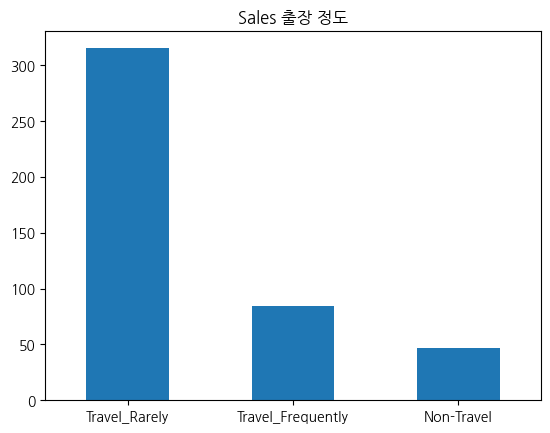

In [118]:
df_sales['BusinessTravel'].value_counts().plot.bar(rot=0, title='Sales 출장 정도')

<AxesSubplot:title={'center':'HR 출장 정도'}>

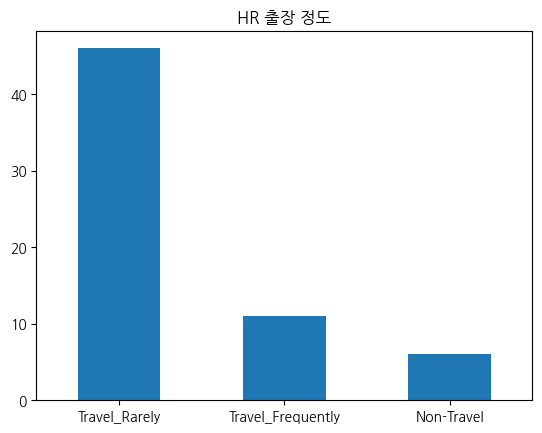

In [119]:
df_hr['BusinessTravel'].value_counts().plot.bar(rot=0, title='HR 출장 정도')

Text(0.5, 1.0, 'RnD 작년 교육 횟수')

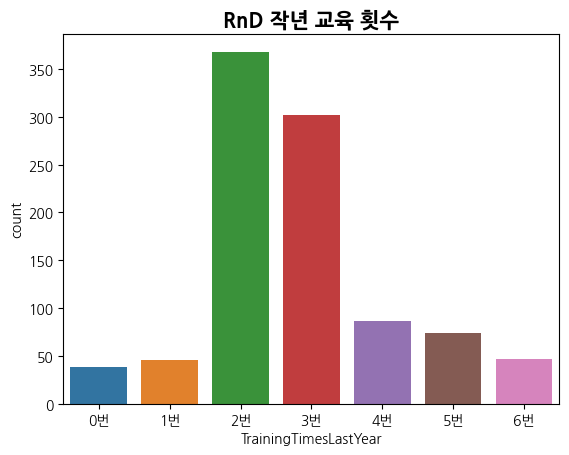

In [124]:

sns.countplot(data = df_RnD, 
              x = 'TrainingTimesLastYear',
#               palette = ['색깔정해서','넣자랏']
             )
plt.xticks(ticks = [0,1,2,3,4,5,6], labels = ['0번','1번','2번', '3번', '4번', '5번', '6번'])
plt.title('RnD 작년 교육 횟수', weight = 'bold', size = 15)

Text(0.5, 1.0, 'sales 작년 교육 횟수')

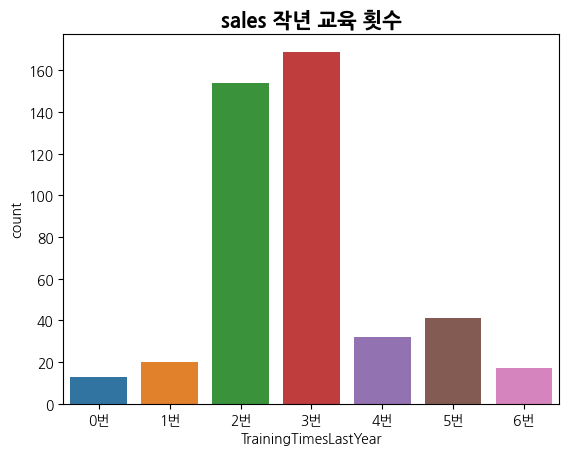

In [127]:

sns.countplot(data = df_sales, 
              x = 'TrainingTimesLastYear',
#               palette = ['색깔정해서','넣자랏']
             )
plt.xticks(ticks = [0,1,2,3,4,5,6], labels = ['0번','1번','2번', '3번', '4번', '5번', '6번'])
plt.title('sales 작년 교육 횟수', weight = 'bold', size = 15)

Text(0.5, 1.0, 'HR 작년 교육 횟수')

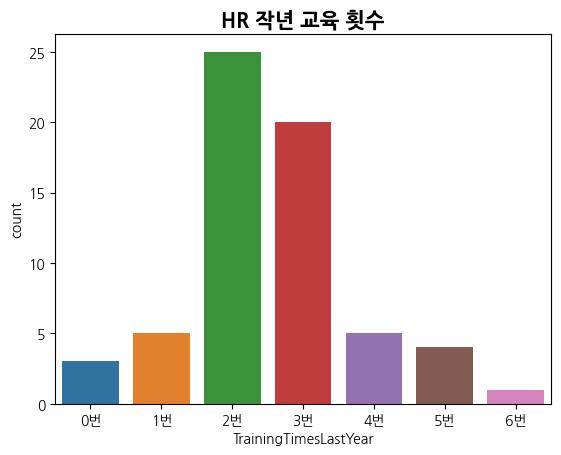

In [128]:
sns.countplot(data = df_hr, 
              x = 'TrainingTimesLastYear',
#               palette = ['색깔정해서','넣자랏']
             )
plt.xticks(ticks = [0,1,2,3,4,5,6], labels = ['0번','1번','2번', '3번', '4번', '5번', '6번'])
plt.title('HR 작년 교육 횟수', weight = 'bold', size = 15)

## 직무별 만족도

In [131]:
df_RnD['JobSatisfaction'].value_counts()

3    300
4    295
1    192
2    174
Name: JobSatisfaction, dtype: int64

Text(0.5, 1.0, 'RnD 직무 만족도')

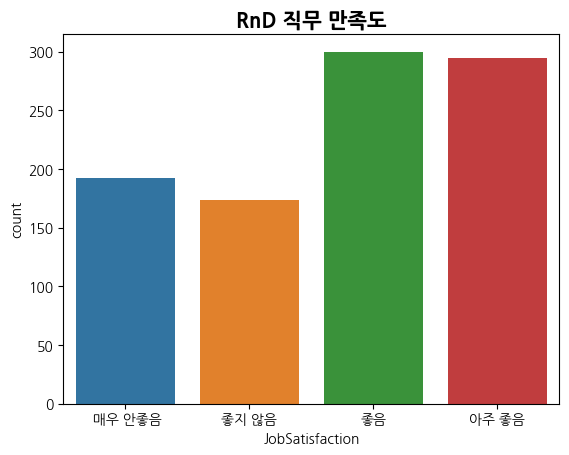

In [132]:
sns.countplot(data = df_RnD, 
              x = 'JobSatisfaction',
#               palette = ['색깔정해서','넣자랏']
             )
plt.xticks(ticks = [0,1,2,3], labels = [' 매우 안좋음','좋지 않음','좋음', '아주 좋음'])
plt.title('RnD 직무 만족도', weight = 'bold', size = 15)

Text(0.5, 1.0, 'Sales 직무 만족도')

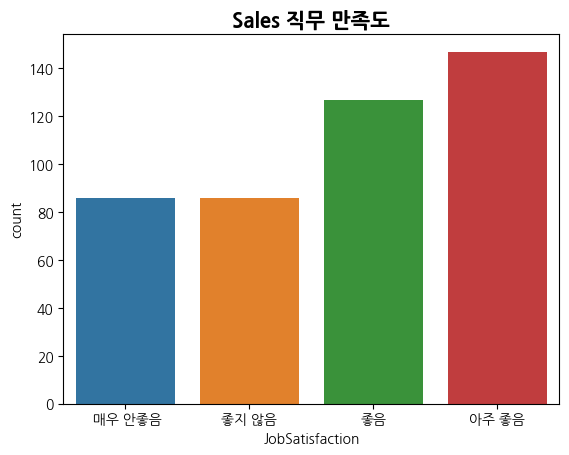

In [134]:
sns.countplot(data = df_sales, 
              x = 'JobSatisfaction',
#               palette = ['색깔정해서','넣자랏']
             )
plt.xticks(ticks = [0,1,2,3], labels = [' 매우 안좋음','좋지 않음','좋음', '아주 좋음'])
plt.title('Sales 직무 만족도', weight = 'bold', size = 15)

Text(0.5, 1.0, 'HR 직무 만족도')

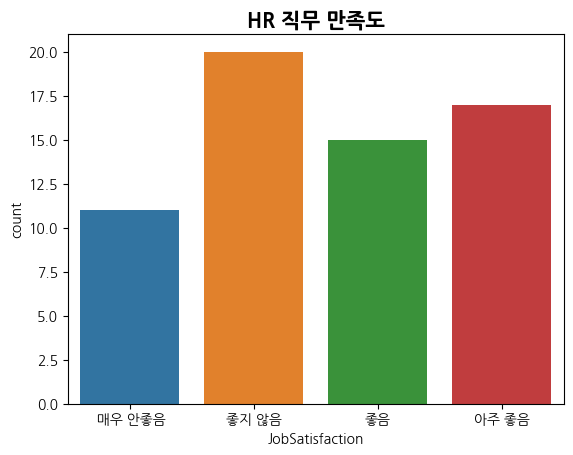

In [135]:
sns.countplot(data = df_hr, 
              x = 'JobSatisfaction',
#               palette = ['색깔정해서','넣자랏']
             )
plt.xticks(ticks = [0,1,2,3], labels = [' 매우 안좋음','좋지 않음','좋음', '아주 좋음'])
plt.title('HR 직무 만족도', weight = 'bold', size = 15)

## 퇴사 조사

Text(0.5, 1.0, 'RnD 퇴사 인원')

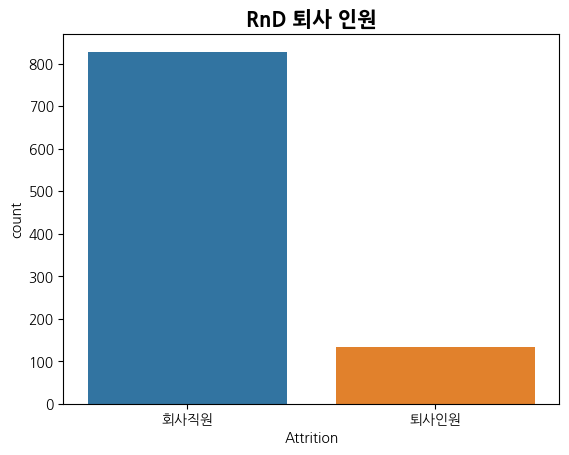

In [142]:
sns.countplot(data = df_RnD, 
              x = 'Attrition',
#               palette = ['색깔정해서','넣자랏']
             )
plt.xticks(ticks = [0,1], labels = ['회사직원','퇴사인원'])
plt.title('RnD 퇴사 인원', weight = 'bold', size = 15)

In [144]:
# 퇴사 직원 특징 알아보기
df_RnD.loc[df_RnD['Attrition']=='Yes']

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
19,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,3,Male,50,2,1,Laboratory Technician,3,Single,2028,12947,5,Y,Yes,14,3,2,80,0,6,4,3,4,2,0,3
31,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,2,Male,83,3,1,Research Scientist,1,Single,2960,17102,2,Y,No,11,3,3,80,0,8,2,3,4,2,1,3
33,32,Yes,Travel_Frequently,1125,Research & Development,16,1,Life Sciences,1,2,Female,72,1,1,Research Scientist,1,Single,3919,4681,1,Y,Yes,22,4,2,80,0,10,5,3,10,2,6,7
45,24,Yes,Travel_Rarely,813,Research & Development,1,3,Medical,1,2,Male,61,3,1,Research Scientist,4,Married,2293,3020,2,Y,Yes,16,3,1,80,1,6,2,2,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1907,56,Yes,Travel_Rarely,1162,Research & Development,24,2,Life Sciences,1,1,Male,97,3,1,Laboratory Technician,4,Single,2587,10261,1,Y,No,16,3,4,80,0,5,3,3,4,2,1,0
1939,32,Yes,Travel_Frequently,238,Research & Development,5,2,Life Sciences,1,1,Female,47,4,1,Research Scientist,3,Single,2432,15318,3,Y,Yes,14,3,1,80,0,8,2,3,4,1,0,3
1960,28,Yes,Travel_Rarely,1404,Research & Development,17,3,Technical Degree,1,3,Male,32,2,1,Laboratory Technician,4,Divorced,2367,18779,5,Y,No,12,3,1,80,1,6,2,2,4,1,0,3


In [29]:
df_out = df_raw.loc[df_raw['Attrition']=='Yes']
df_out

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
4,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0
19,28,Yes,Travel_Rarely,Research & Development,24,3,Life Sciences,3,Male,2,1,Laboratory Technician,3,Single,2028,5,Yes,14,3,2,0,6,4,3,4,2,0,3
27,36,Yes,Travel_Rarely,Sales,9,4,Life Sciences,3,Male,2,1,Sales Representative,1,Single,3407,7,No,23,4,2,0,10,4,3,5,3,0,3
31,34,Yes,Travel_Rarely,Research & Development,6,1,Medical,2,Male,3,1,Research Scientist,1,Single,2960,2,No,11,3,3,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,23,Yes,Travel_Frequently,Sales,9,3,Marketing,4,Male,3,1,Sales Representative,1,Married,1790,1,No,19,3,1,1,1,3,2,1,0,1,0
2027,29,Yes,Travel_Rarely,Research & Development,1,4,Medical,1,Male,3,1,Research Scientist,4,Married,4787,9,Yes,14,3,2,3,4,3,4,2,2,2,2
2032,56,Yes,Travel_Rarely,Research & Development,7,2,Technical Degree,4,Male,3,1,Laboratory Technician,3,Married,2339,8,No,11,3,4,1,14,4,1,10,9,9,8


Text(0.5, 1.0, '퇴직자 만족도')

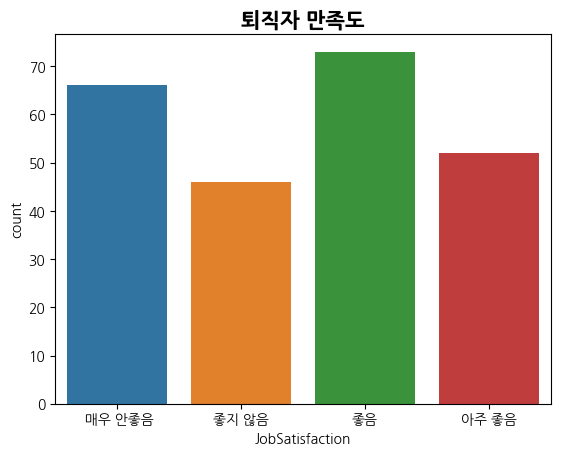

In [186]:
# 직무 만족도 => 이걸파보면 재밌을 듯 그러나 질문 설정이 애매하다. => HR에서 분석할 때, 설문지 항목에 그냥 귀하의 직무 만족도 어떤지 묻는 것보다는 구별을 해서 얻어야 더욱 필요한 정보를 얻을 수 있다.
# => 여기서의 만족도는 이 일을 좋아하는지의 여부인 것으로 판단된다.
# JobSatisfaction의 만족성이 좋은 사람들만 뽑아서 다른 환경 만족도 등을 보아서 비교하기! 일은 만족스러운데, 사람이 힘들거나 환경이 힘들다!!!!
sns.countplot(data = df_out, 
              x = 'JobSatisfaction',
#               palette = ['색깔정해서','넣자랏']
             )
plt.xticks(ticks = [0,1,2,3], labels = [' 매우 안좋음','좋지 않음','좋음', '아주 좋음'])
plt.title('퇴직자 만족도', weight = 'bold', size = 15)

Text(0.5, 1.0, '퇴사자들의 작년 교육 횟수')

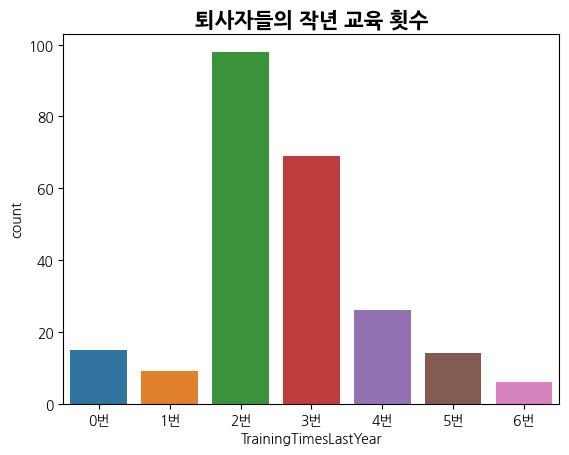

In [147]:
# 퇴사자들의 교육 횟수
sns.countplot(data = df_out, 
              x = 'TrainingTimesLastYear',
#               palette = ['색깔정해서','넣자랏']
             )
plt.xticks(ticks = [0,1,2,3,4,5,6], labels = ['0번','1번','2번', '3번', '4번', '5번', '6번'])
plt.title('퇴사자들의 작년 교육 횟수', weight = 'bold', size = 15)

<AxesSubplot:title={'center':'퇴사자들의 출장 정도'}>

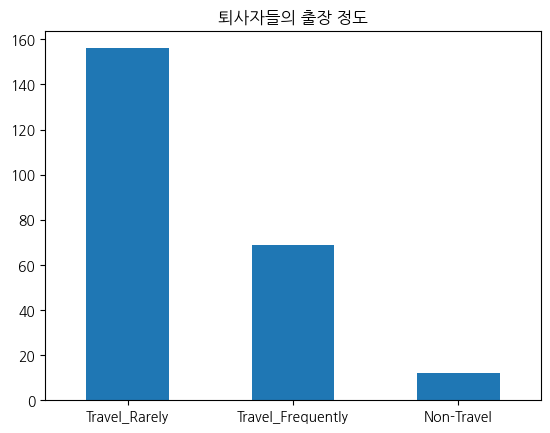

In [148]:
df_out['BusinessTravel'].value_counts().plot.bar(rot=0, title='퇴사자들의 출장 정도')

Text(0.5, 1.0, '퇴사자들 학력')

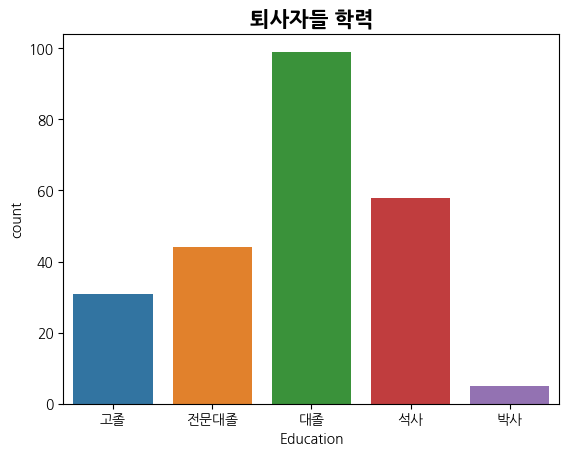

In [149]:
sns.countplot(data = df_out, 
              x = 'Education',
#               palette = ['색깔정해서','넣자랏']
             )
plt.xticks(ticks = [0,1,2,3,4], labels = ['고졸','전문대졸','대졸', '석사', '박사'])
plt.title('퇴사자들 학력', weight = 'bold', size = 15)

Text(0.5, 1.0, '전공별 퇴사')

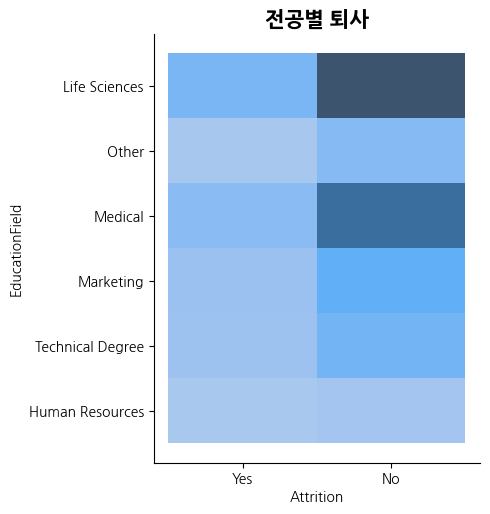

In [187]:
# 퇴사 안한 사람이 더 많아서 색 차이가 나타나는 듯
# 비율로 보기!!!
sns.displot(data = df_raw, 
            x='Attrition',
            y = 'EducationField',
#               palette = ['색깔정해서','넣자랏']
             )

plt.title('전공별 퇴사', weight = 'bold', size = 15)

In [181]:
# sns.catplot(data=df_raw, x='JobRole', kind='count')

In [185]:
df_raw['Over18'].nunique()

1

## 본격적으로 제가 맡은 부분의 퇴사 여부 예측을 해보겠습니다.
이를 위하여 비율로 데이터 프레임 만드는 것 필요해보임


In [32]:
df_RnD


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
8,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2057,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2,Male,74,3,2,Manufacturing Director,1,Single,9936,3787,0,Y,No,19,3,2,80,0,10,2,3,9,4,1,7
2061,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
2062,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7


In [27]:
# 1233행 => 1233으로 나누어 비율 구하기
df_in = df_raw.loc[df_raw['Attrition']=='No']
df_in

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
5,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2
8,32,No,Travel_Frequently,Research & Development,2,2,Life Sciences,4,Male,3,1,Laboratory Technician,4,Single,3068,0,No,13,3,3,0,8,2,2,7,7,3,6
10,59,No,Travel_Rarely,Research & Development,3,3,Medical,3,Female,4,1,Laboratory Technician,1,Married,2670,4,Yes,20,4,1,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,2,Medical,3,Male,4,2,Laboratory Technician,4,Married,2571,4,No,17,3,3,1,17,3,3,5,2,0,3
2062,39,No,Travel_Rarely,Research & Development,6,1,Medical,4,Male,2,3,Healthcare Representative,1,Married,9991,4,No,15,3,1,1,9,5,3,7,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2,Male,4,2,Manufacturing Director,2,Married,6142,1,Yes,20,4,2,1,6,0,3,6,2,0,3


In [42]:
# 237로 나누어 비율 구하기
df_out

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
4,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0
19,28,Yes,Travel_Rarely,Research & Development,24,3,Life Sciences,3,Male,2,1,Laboratory Technician,3,Single,2028,5,Yes,14,3,2,0,6,4,3,4,2,0,3
27,36,Yes,Travel_Rarely,Sales,9,4,Life Sciences,3,Male,2,1,Sales Representative,1,Single,3407,7,No,23,4,2,0,10,4,3,5,3,0,3
31,34,Yes,Travel_Rarely,Research & Development,6,1,Medical,2,Male,3,1,Research Scientist,1,Single,2960,2,No,11,3,3,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,23,Yes,Travel_Frequently,Sales,9,3,Marketing,4,Male,3,1,Sales Representative,1,Married,1790,1,No,19,3,1,1,1,3,2,1,0,1,0
2027,29,Yes,Travel_Rarely,Research & Development,1,4,Medical,1,Male,3,1,Research Scientist,4,Married,4787,9,Yes,14,3,2,3,4,3,4,2,2,2,2
2032,56,Yes,Travel_Rarely,Research & Development,7,2,Technical Degree,4,Male,3,1,Laboratory Technician,3,Married,2339,8,No,11,3,4,1,14,4,1,10,9,9,8


In [59]:
df_raw[df_raw['NumCompaniesWorked']==1]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
5,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0
11,30,No,Travel_Rarely,Research & Development,24,1,Life Sciences,4,Male,3,1,Laboratory Technician,3,Divorced,2693,1,No,22,4,2,1,1,2,3,1,0,0,0
16,31,No,Travel_Rarely,Research & Development,26,1,Life Sciences,1,Male,3,1,Research Scientist,3,Divorced,2911,1,No,17,3,4,1,5,1,2,5,2,4,3
20,29,No,Travel_Rarely,Research & Development,21,4,Life Sciences,2,Female,4,3,Manufacturing Director,1,Divorced,9980,1,No,11,3,3,1,10,1,3,10,9,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041,38,No,Travel_Rarely,Sales,10,2,Life Sciences,1,Female,3,2,Sales Executive,4,Married,5343,1,No,11,3,3,1,10,1,3,10,7,1,9
2049,35,No,Travel_Frequently,Research & Development,18,4,Life Sciences,3,Male,3,2,Healthcare Representative,3,Married,5689,1,Yes,14,3,4,2,10,2,4,10,2,0,2
2052,35,No,Travel_Rarely,Research & Development,1,4,Life Sciences,3,Female,1,1,Research Scientist,4,Married,2977,1,No,12,3,4,1,4,5,3,4,3,1,1


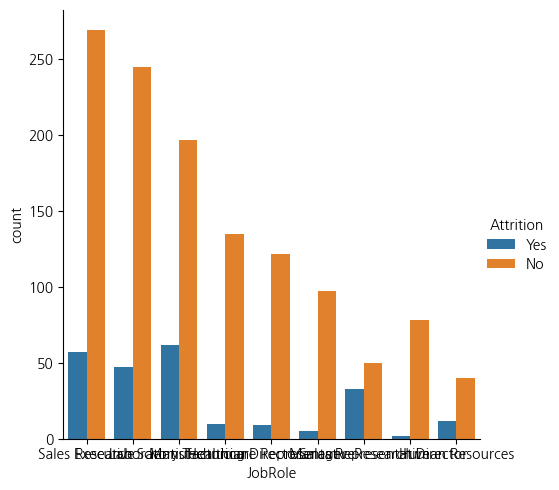

In [26]:
sns.catplot(data=df_raw,  x ='JobRole', hue='Attrition', kind='count')

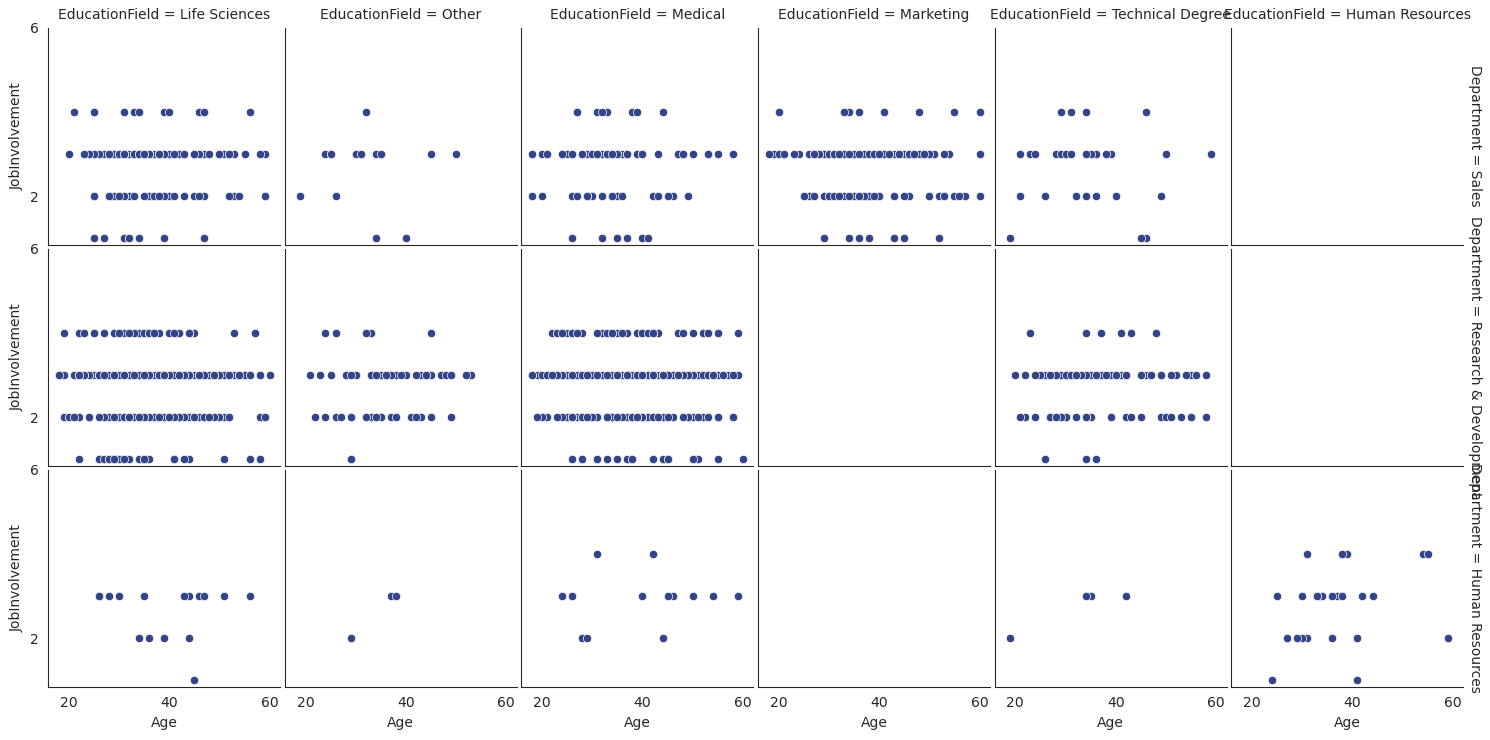

In [48]:
with sns.axes_style("white"):
    g = sns.FacetGrid(df_raw, row="Department", col="EducationField", margin_titles=True, height=2.5)
g.map(sns.scatterplot, "Age", "JobInvolvement", color="#334488")
g.set_axis_labels("Age", "JobInvolvement")
g.set(xticks=[20, 40, 60], yticks=[2, 6])
g.figure.subplots_adjust(wspace=.02, hspace=.02)

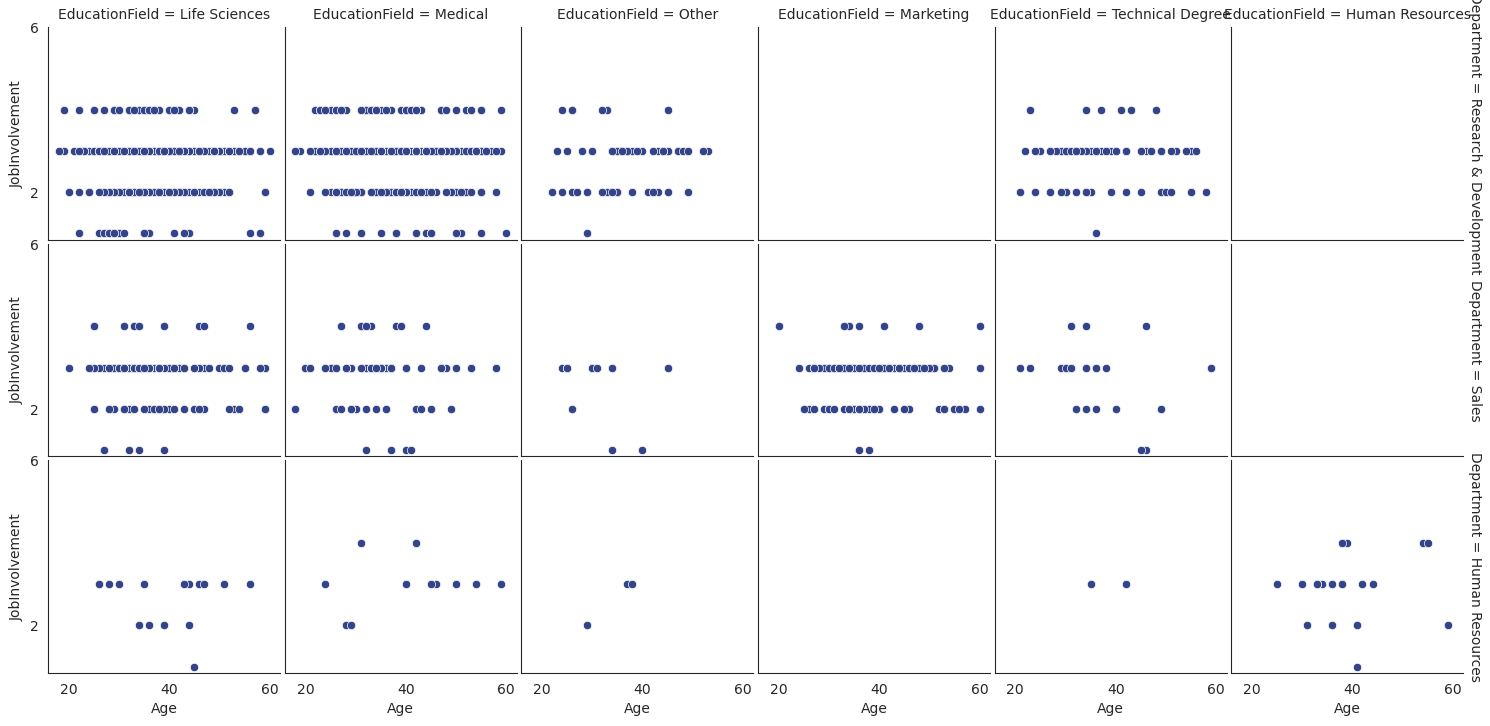

In [49]:
with sns.axes_style("white"):
    g = sns.FacetGrid(df_in, row="Department", col="EducationField", margin_titles=True, height=2.5)
g.map(sns.scatterplot, "Age", "JobInvolvement", color="#334488")
g.set_axis_labels("Age", "JobInvolvement")
g.set(xticks=[20, 40, 60], yticks=[2, 6])
g.figure.subplots_adjust(wspace=.02, hspace=.02)

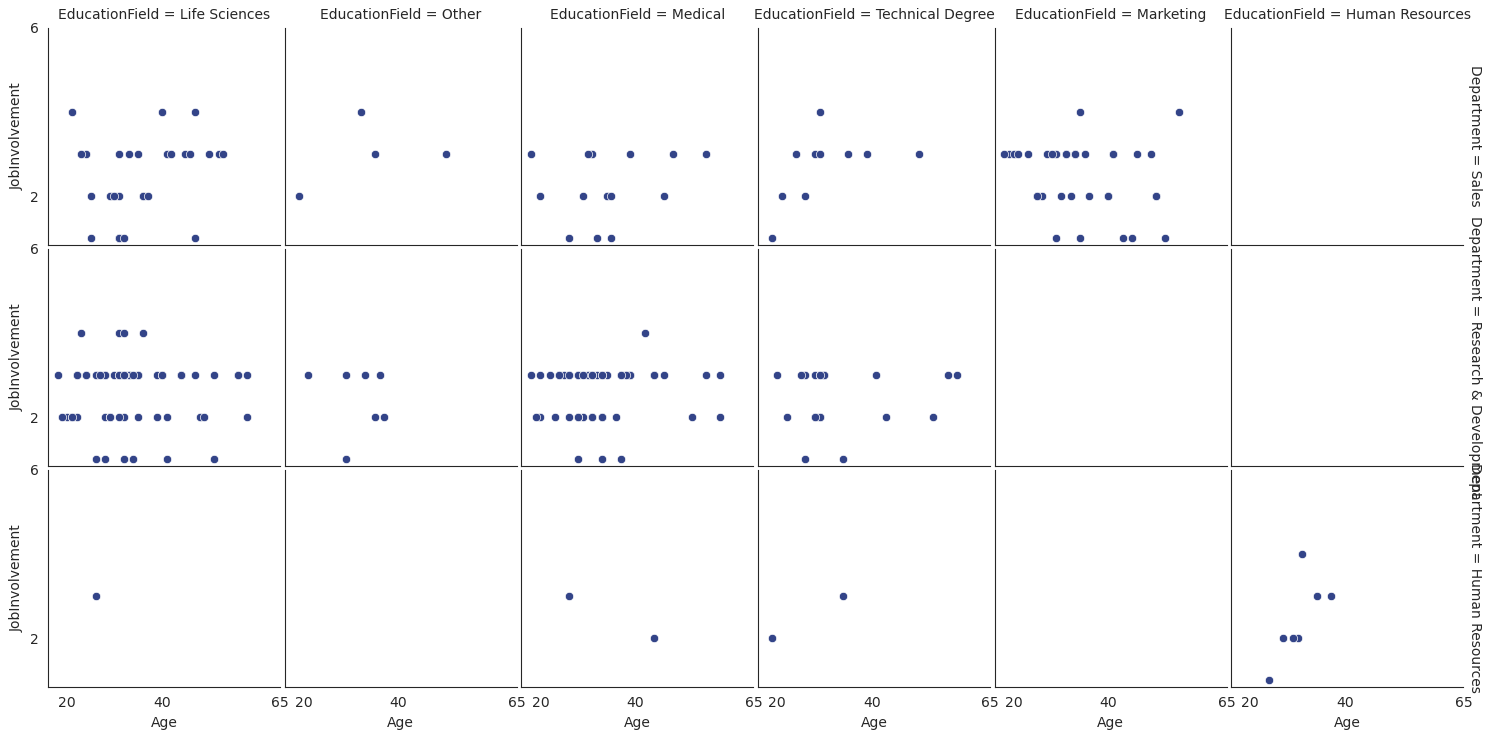

In [51]:
with sns.axes_style("white"):
    g = sns.FacetGrid(df_out, row="Department", col="EducationField", margin_titles=True, height=2.5)
g.map(sns.scatterplot, "Age", "JobInvolvement", color="#334488")
g.set_axis_labels("Age", "JobInvolvement")
g.set(xticks=[20, 40, 65], yticks=[2, 6])
g.figure.subplots_adjust(wspace=.02, hspace=.02)

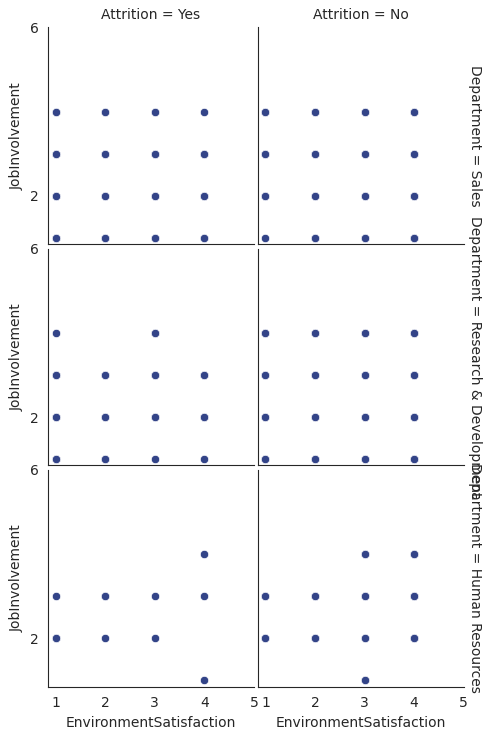

In [54]:
# 넣을 요소 생각해보기
with sns.axes_style("white"):
    g = sns.FacetGrid(df_raw, row="Department", col="Attrition", margin_titles=True, height=2.5)
g.map(sns.scatterplot, "","BusinessTravel", color="#334488")
g.set_axis_labels("EnvironmentSatisfaction", "BusinessTravel")
g.set(xticks=[1, 2, 3, 4, 5], yticks=[2, 6])
g.figure.subplots_adjust(wspace=.02, hspace=.02)

In [ ]:
g = sns.FacetGrid(df_raw, col="smoker", margin_titles=True, height=4)
g.map(plt.scatter, "total_bill", "tip", color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes_dict.values():
    ax.axline((0, 0), slope=.2, c=".2", ls="--", zorder=0)
g.set(xlim=(0, 60), ylim=(0, 14))

In [60]:
df_raw

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,2,Medical,3,Male,4,2,Laboratory Technician,4,Married,2571,4,No,17,3,3,1,17,3,3,5,2,0,3
2062,39,No,Travel_Rarely,Research & Development,6,1,Medical,4,Male,2,3,Healthcare Representative,1,Married,9991,4,No,15,3,1,1,9,5,3,7,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2,Male,4,2,Manufacturing Director,2,Married,6142,1,Yes,20,4,2,1,6,0,3,6,2,0,3


C:\Users\kelly\AppData\Local\Temp\ipykernel_33780\753708546.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_dept['percent'] = df_dept.groupby('Department')['counts'].apply(lambda x: 100 * x / float(x.sum()))


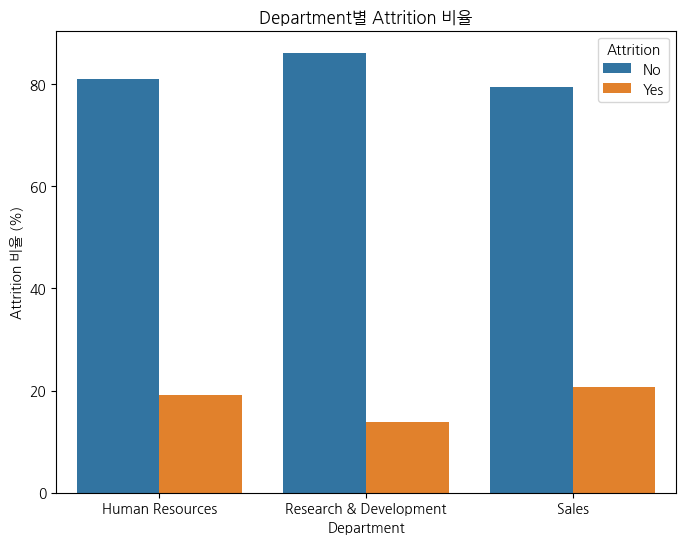

In [61]:

# Department와 Attrition 간의 연관성 확인
df_dept = df_raw.groupby(['Department', 'Attrition']).size().reset_index(name='counts')

# Department별로 Attrition의 비율 계산
df_dept['percent'] = df_dept.groupby('Department')['counts'].apply(lambda x: 100 * x / float(x.sum()))

# 그래프 그리기
plt.figure(figsize=(8, 6))
sns.barplot(x='Department', y='percent', hue='Attrition', data=df_dept)
plt.title('Department별 Attrition 비율')
plt.xlabel('Department')
plt.ylabel('Attrition 비율 (%)')
plt.show()

In [62]:
df_dept

,Department,Attrition,counts,percent
0,Human Resources,No,51,80.952381
1,Human Resources,Yes,12,19.047619
2,Research & Development,No,828,86.160250
3,Research & Development,Yes,133,13.839750
4,Sales,No,354,79.372197
5,Sales,Yes,92,20.627803


In [88]:

# Department와 Attrition 간의 연관성 확인
df_dept_1 = df_raw.groupby(['Department', 'Attrition']).size().reset_index(name='counts')

# Department별로 Attrition의 비율 계산
df_dept_1['percent'] = df_dept_1.groupby('Department')['counts'].apply(lambda x: 100 * x / float(x.sum()))

df_dept_1

C:\Users\kelly\AppData\Local\Temp\ipykernel_33780\589764816.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_dept_1['percent'] = df_dept_1.groupby('Department')['counts'].apply(lambda x: 100 * x / float(x.sum()))


,Department,Attrition,counts,percent
0,Human Resources,No,51,80.952381
1,Human Resources,Yes,12,19.047619
2,Research & Development,No,828,86.160250
3,Research & Development,Yes,133,13.839750
4,Sales,No,354,79.372197
5,Sales,Yes,92,20.627803


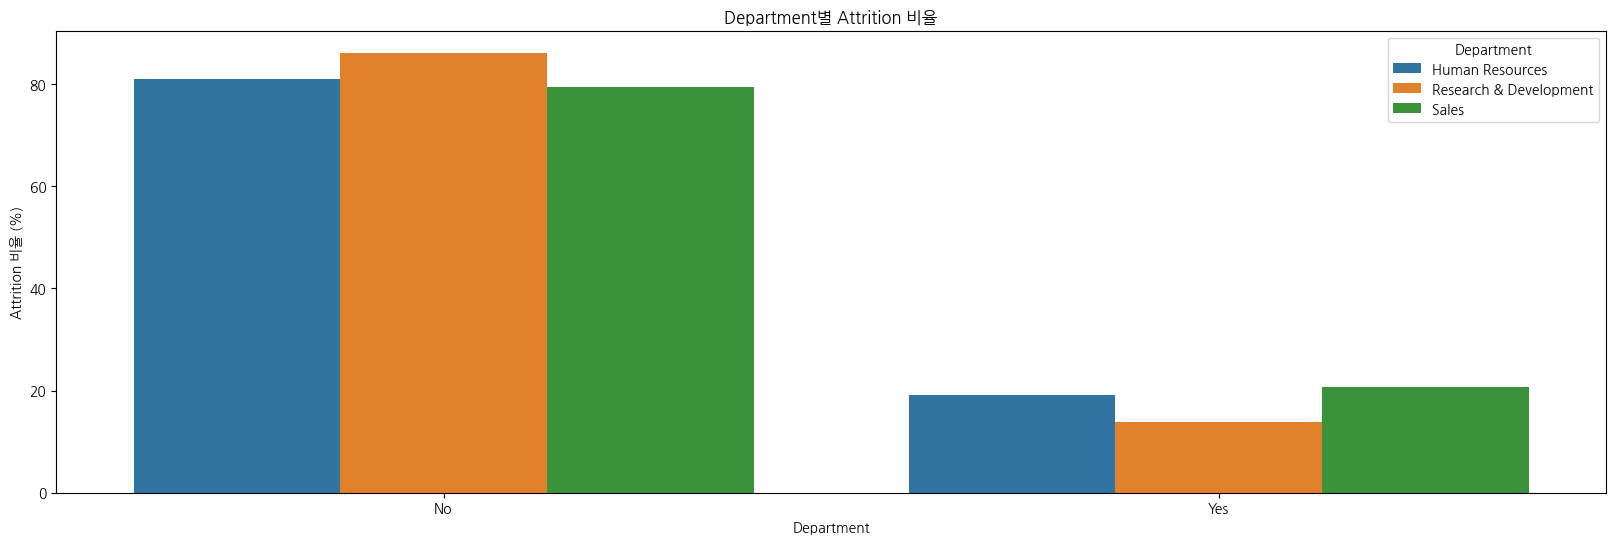

In [84]:
plt.figure(figsize=(20, 6))
sns.barplot(x='Attrition', y='percent', hue='Department', data=df_dept_1)
plt.title('Department별 Attrition 비율')
plt.xlabel('Department')

plt.ylabel('Attrition 비율 (%)')
plt.show()

In [73]:
df_dept_1

,Department,Attrition,counts,percent
0,Human Resources,No,51,80.952381
1,Human Resources,Yes,12,19.047619
2,Research & Development,No,828,86.160250
3,Research & Development,Yes,133,13.839750
4,Sales,No,354,79.372197
5,Sales,Yes,92,20.627803


In [85]:
df_raw

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,2,Medical,3,Male,4,2,Laboratory Technician,4,Married,2571,4,No,17,3,3,1,17,3,3,5,2,0,3
2062,39,No,Travel_Rarely,Research & Development,6,1,Medical,4,Male,2,3,Healthcare Representative,1,Married,9991,4,No,15,3,1,1,9,5,3,7,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2,Male,4,2,Manufacturing Director,2,Married,6142,1,Yes,20,4,2,1,6,0,3,6,2,0,3


In [87]:
# Department와 Attrition 간의 연관성 확인
df_dept_2 = df_raw.groupby(['Department', 'Attrition', 'Education']).size().reset_index(name='counts')

# Department별로 Attrition의 비율 계산
df_dept_2['percent'] = df_dept_2.groupby('Department')['counts'].apply(lambda x: 100 * x / float(x.sum()))

df_dept_2

C:\Users\kelly\AppData\Local\Temp\ipykernel_33780\3606913207.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_dept_2['percent'] = df_dept_2.groupby('Department')['counts'].apply(lambda x: 100 * x / float(x.sum()))


,Department,Attrition,Education,counts,percent
0,Human Resources,No,1,4,6.349206
1,Human Resources,No,2,10,15.873016
2,Human Resources,No,3,23,36.507937
3,Human Resources,No,4,12,19.047619
4,Human Resources,No,5,2,3.174603
5,Human Resources,Yes,1,1,1.587302
6,Human Resources,Yes,2,3,4.761905
7,Human Resources,Yes,3,4,6.349206
8,Human Resources,Yes,4,3,4.761905
9,Human Resources,Yes,5,1,1.587302


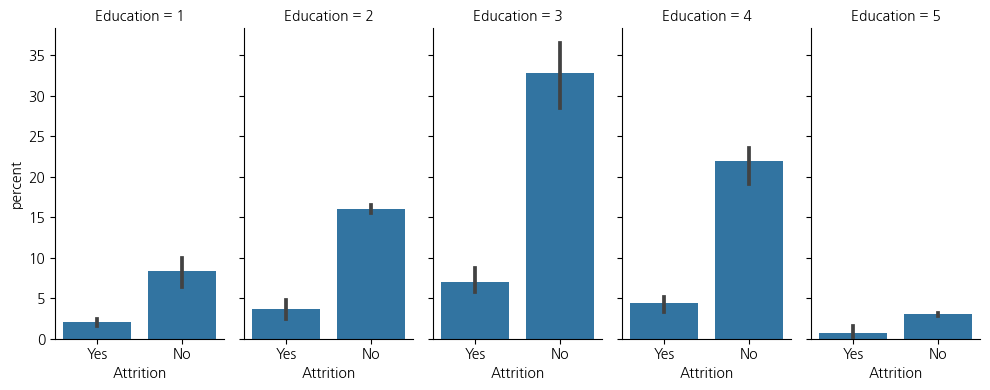

In [116]:
g = sns.FacetGrid(df_dept_2, col="Education", height=4, aspect=.5)
g.map(sns.barplot, "Attrition", "percent", order=["Yes", "No"])

In [112]:
df_edu = df_raw.groupby(['Attrition', 'Education']).size().reset_index(name='counts')

# Department별로 Attrition의 비율 계산
df_edu['percent'] = df_edu.groupby('Attrition')['counts'].apply(lambda x: 100 * x / float(x.sum()))

df_edu

C:\Users\kelly\AppData\Local\Temp\ipykernel_33780\3948827721.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_edu['percent'] = df_edu.groupby('Attrition')['counts'].apply(lambda x: 100 * x / float(x.sum()))


,Attrition,Education,counts,percent
0,No,1,139,11.273317
1,No,2,238,19.302514
2,No,3,473,38.361719
3,No,4,340,27.575020
4,No,5,43,3.487429
5,Yes,1,31,13.080169
6,Yes,2,44,18.565401
7,Yes,3,99,41.772152
8,Yes,4,58,24.472574
9,Yes,5,5,2.109705


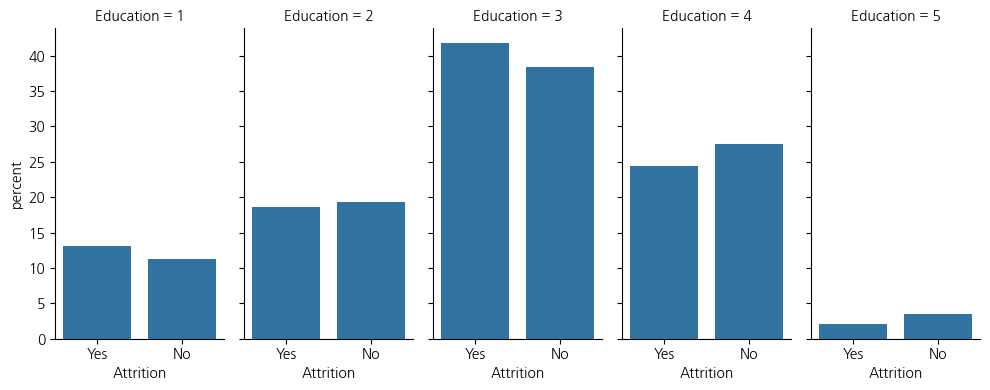

In [114]:
edu = sns.FacetGrid(df_edu, col="Education", height=4, aspect=.5)
edu.map(sns.barplot, "Attrition", "percent", order=["Yes", "No"])

In [93]:
# Department와 Attrition 간의 연관성 확인
df_dept_sat = df_raw.groupby(['Department', 'Attrition', 'JobSatisfaction']).size().reset_index(name='counts')

# Department별로 Attrition의 비율 계산
df_dept_sat['percent'] = df_dept_sat.groupby('Department')['counts'].apply(lambda x: 100 * x / float(x.sum()))

df_dept_sat

C:\Users\kelly\AppData\Local\Temp\ipykernel_33780\1562444634.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_dept_sat['percent'] = df_dept_sat.groupby('Department')['counts'].apply(lambda x: 100 * x / float(x.sum()))


,Department,Attrition,JobSatisfaction,counts,percent
0,Human Resources,No,1,6,9.523810
1,Human Resources,No,2,18,28.571429
2,Human Resources,No,3,12,19.047619
3,Human Resources,No,4,15,23.809524
4,Human Resources,Yes,1,5,7.936508
5,Human Resources,Yes,2,2,3.174603
6,Human Resources,Yes,3,3,4.761905
7,Human Resources,Yes,4,2,3.174603
8,Research & Development,No,1,154,16.024974
9,Research & Development,No,2,150,15.608741


In [105]:
# JobSatisfaction와 Attrition 간의 연관성 확인
df_sat = df_raw.groupby(['Attrition', 'JobSatisfaction']).size().reset_index(name='counts')

# Department별로 Attrition의 비율 계산
df_sat['percent'] = df_sat.groupby('Attrition')['counts'].apply(lambda x: 100 * x / float(x.sum()))

df_sat

C:\Users\kelly\AppData\Local\Temp\ipykernel_33780\3776630845.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_sat['percent'] = df_sat.groupby('Attrition')['counts'].apply(lambda x: 100 * x / float(x.sum()))


,Attrition,JobSatisfaction,counts,percent
0,No,1,223,18.085969
1,No,2,234,18.978102
2,No,3,369,29.927007
3,No,4,407,33.008921
4,Yes,1,66,27.848101
5,Yes,2,46,19.409283
6,Yes,3,73,30.801688
7,Yes,4,52,21.940928


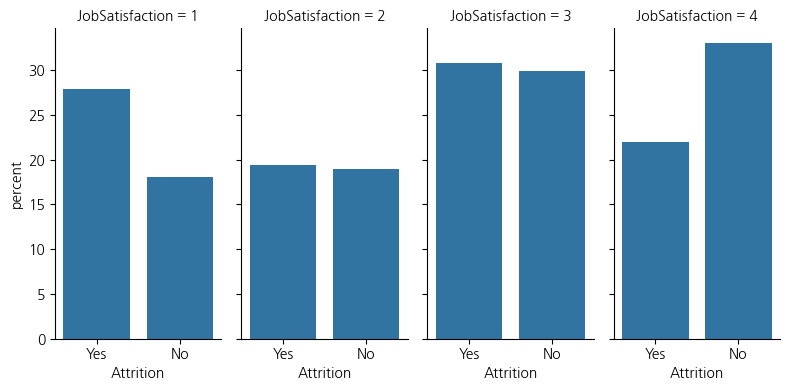

In [103]:
s = sns.FacetGrid(df_sat, col="JobSatisfaction", height=4, aspect=.5)
s.map(sns.barplot, "Attrition", "percent", order=["Yes", "No"])

In [106]:
# Department와 Attrition 간의 연관성 확인
df_jr = df_raw.groupby(['Attrition', 'JobRole']).size().reset_index(name='counts')

# Department별로 Attrition의 비율 계산
df_jr['percent'] = df_jr.groupby('Attrition')['counts'].apply(lambda x: 100 * x / float(x.sum()))

df_jr

C:\Users\kelly\AppData\Local\Temp\ipykernel_33780\3063205907.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_jr['percent'] = df_jr.groupby('Attrition')['counts'].apply(lambda x: 100 * x / float(x.sum()))


,Attrition,JobRole,counts,percent
0,No,Healthcare Representative,122,9.894566
1,No,Human Resources,40,3.244120
2,No,Laboratory Technician,197,15.977291
3,No,Manager,97,7.866991
4,No,Manufacturing Director,135,10.948905
5,No,Research Director,78,6.326034
6,No,Research Scientist,245,19.870235
7,No,Sales Executive,269,21.816707
8,No,Sales Representative,50,4.055150
9,Yes,Healthcare Representative,9,3.797468


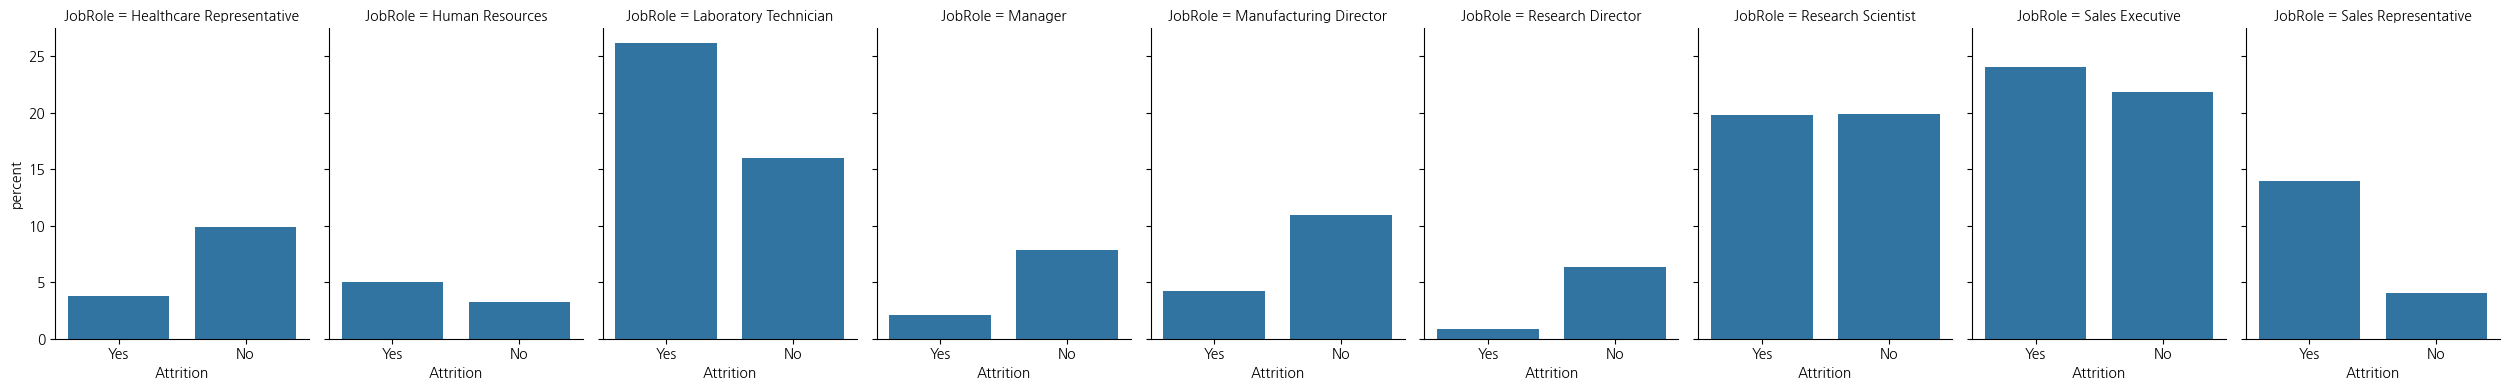

In [109]:
jr = sns.FacetGrid(df_jr, col="JobRole", height=4, aspect=.7)
jr.map(sns.barplot, "Attrition", "percent", order=["Yes", "No"])

In [110]:
df_bt = df_raw.groupby(['Attrition', 'BusinessTravel']).size().reset_index(name='counts')

# Business Travel별로 Attrition의 비율 계산
df_bt['percent'] = df_bt.groupby('Attrition')['counts'].apply(lambda x: 100 * x / float(x.sum()))

df_bt

C:\Users\kelly\AppData\Local\Temp\ipykernel_33780\626127323.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_bt['percent'] = df_bt.groupby('Attrition')['counts'].apply(lambda x: 100 * x / float(x.sum()))


,Attrition,BusinessTravel,counts,percent
0,No,Non-Travel,138,11.192214
1,No,Travel_Frequently,208,16.869424
2,No,Travel_Rarely,887,71.938362
3,Yes,Non-Travel,12,5.063291
4,Yes,Travel_Frequently,69,29.113924
5,Yes,Travel_Rarely,156,65.822785


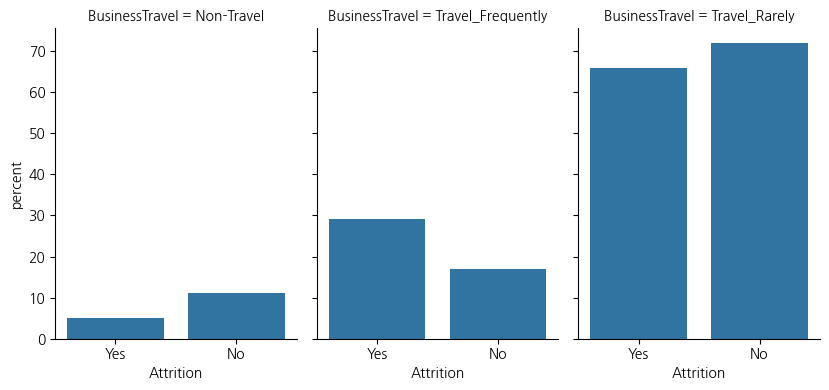

In [111]:
bt = sns.FacetGrid(df_bt, col="BusinessTravel", height=4, aspect=.7)
bt.map(sns.barplot, "Attrition", "percent", order=["Yes", "No"])

## PCA 분석하기
짧은 설명

PCA(Principal Component Analysis)는 다차원 데이터의 차원을 축소하면서 데이터의 주요 특성을 파악하는 방법 중 하나입니다. 이는 매우 많은 변수를 가진 데이터에서 그 중 주요한 변수를 추출해 차원을 축소하고, 데이터의 패턴을 파악할 수 있는 방법입니다.

PCA는 기존의 변수들을 선형 결합으로 새로운 변수를 만들어내는데, 이때 새로 만들어진 변수를 Principal Component라고 부릅니다. Principal Component들은 기존 변수들과 서로 독립적인 새로운 축이며, 이 축들은 서로 수직을 이룹니다.

PCA는 두 가지 목적을 가집니다. 첫째, 차원을 축소함으로써 기존 변수들이 가지고 있는 정보를 요약하고, 새로운 변수들이 가지는 정보를 분석하는 것입니다. 둘째, 축소된 변수들을 이용하여 데이터를 분류하거나 클러스터링 하는 것입니다.

PCA는 데이터 분석, 영상처리, 패턴인식 등 다양한 분야에서 활용되며, 데이터 시각화를 위한 차원 축소나 특성 추출 등에서도 많이 사용됩니다.

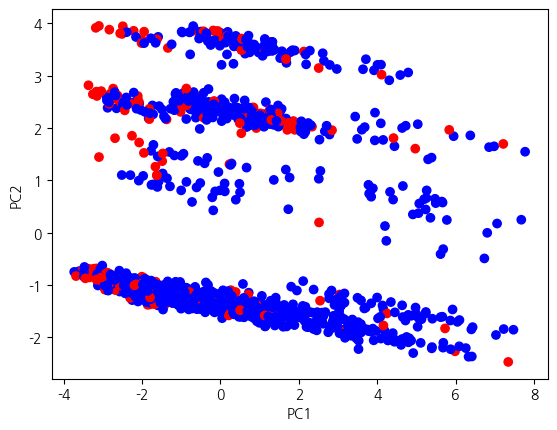

In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 데이터 불러오기
data = pd.read_csv("https://raw.githubusercontent.com/JounKK/AIS8_Final_HRA/main/dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# 범주형 변수 더미 변수로 변환
data = pd.get_dummies(data, columns=["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus"])

# 필요한 컬럼만 선택
cols = ["Age", "Attrition", "DistanceFromHome", "Education", "JobLevel", "MonthlyIncome", "NumCompaniesWorked", "PercentSalaryHike", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", "YearsSinceLastPromotion", "YearsWithCurrManager", "BusinessTravel_Non-Travel", "BusinessTravel_Travel_Frequently", "BusinessTravel_Travel_Rarely", "Department_Human Resources", "Department_Research & Development", "Department_Sales", "EducationField_Human Resources", "EducationField_Life Sciences", "EducationField_Marketing", "EducationField_Medical", "EducationField_Other", "EducationField_Technical Degree", "Gender_Female", "Gender_Male", "JobRole_Healthcare Representative", "JobRole_Human Resources", "JobRole_Laboratory Technician", "JobRole_Manager", "JobRole_Manufacturing Director", "JobRole_Research Director", "JobRole_Research Scientist", "JobRole_Sales Executive", "JobRole_Sales Representative", "MaritalStatus_Divorced", "MaritalStatus_Married", "MaritalStatus_Single"]
data = data[cols]

# 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop("Attrition", axis=1))

# PCA 분석
pca = PCA(n_components=2)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

# 시각화
plt.scatter(pca_data[:,0], pca_data[:,1], c=data["Attrition"].map({"Yes":"red", "No":"blue"}))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()



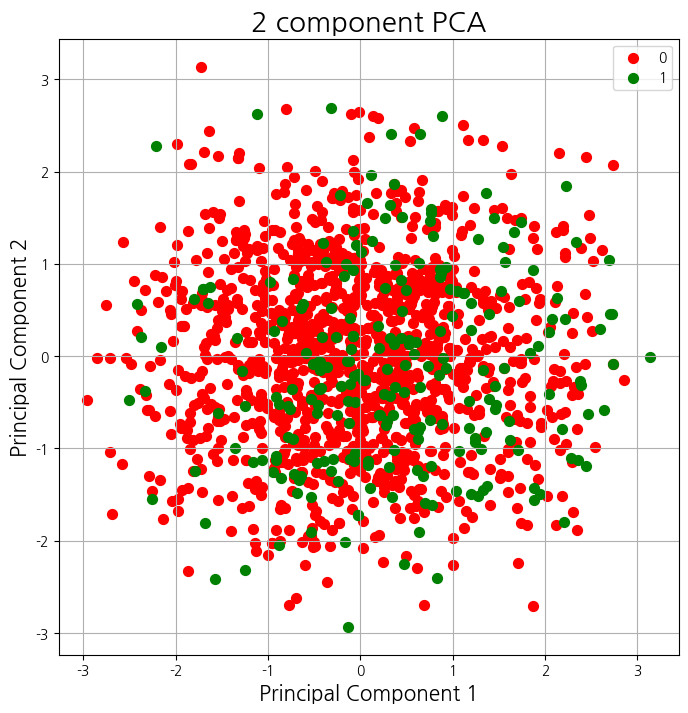

In [123]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
df = pd.read_csv("https://raw.githubusercontent.com/JounKK/AIS8_Final_HRA/main/dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# 필요한 변수 선택
variables = ["Age", "DistanceFromHome", "JobSatisfaction", "Education", "JobInvolvement", "Attrition"]
df = df[variables]

# 범주형 변수 숫자로 인코딩
df["Attrition"] = df["Attrition"].apply(lambda x: 1 if x == "Yes" else 0)

# 결측치 처리
df.dropna(inplace=True)

# 표준화
X = df.iloc[:, :-1].values
X = StandardScaler().fit_transform(X)

# PCA 수행
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['Attrition']]], axis = 1)

# 시각화
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Attrition'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


## 유의미한 변수 추출
내가 맡은 것: BusinessTravel(df_bt), EducationField(df_ef), JobRole(Department)(df_jr, df_dept), MaritalStatus

In [125]:
df_es = df_raw[['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus','Education']]
df_es

,Attrition,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,Education
EmployeeNumber,,,,,,,
1,Yes,Travel_Rarely,Sales,Life Sciences,Sales Executive,Single,2
2,No,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,1
4,Yes,Travel_Rarely,Research & Development,Other,Laboratory Technician,Single,2
5,No,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married,4
7,No,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Married,1
...,...,...,...,...,...,...,...
2061,No,Travel_Frequently,Research & Development,Medical,Laboratory Technician,Married,2
2062,No,Travel_Rarely,Research & Development,Medical,Healthcare Representative,Married,1
2064,No,Travel_Rarely,Research & Development,Life Sciences,Manufacturing Director,Married,3


In [130]:
df_es.groupby('Attrition').agg({'BusinessTravel':'value_counts'})

BusinessTravel
Attrition BusinessTravel                   
No        Travel_Rarely                 887
          Travel_Frequently             208
          Non-Travel                    138
Yes       Travel_Rarely                 156
          Travel_Frequently              69
          Non-Travel                     12

In [129]:
df_dept

,Department,Attrition,counts,percent
0,Human Resources,No,51,80.952381
1,Human Resources,Yes,12,19.047619
2,Research & Development,No,828,86.160250
3,Research & Development,Yes,133,13.839750
4,Sales,No,354,79.372197
5,Sales,Yes,92,20.627803


In [133]:
# JobRole와 Attrition 간의 연관성 확인
df_ja = df_es.groupby(['JobRole', 'Attrition']).size().reset_index(name='counts')

# JobRole별로 Attrition의 비율 계산
df_ja['percent'] = df_ja.groupby('Attrition')['counts'].apply(lambda x: 100 * x / float(x.sum()))

df_ja

C:\Users\kelly\AppData\Local\Temp\ipykernel_33780\1473539423.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_ja['percent'] = df_ja.groupby('Attrition')['counts'].apply(lambda x: 100 * x / float(x.sum()))


,JobRole,Attrition,counts,percent
0,Healthcare Representative,No,122,9.894566
1,Healthcare Representative,Yes,9,3.797468
2,Human Resources,No,40,3.244120
3,Human Resources,Yes,12,5.063291
4,Laboratory Technician,No,197,15.977291
5,Laboratory Technician,Yes,62,26.160338
6,Manager,No,97,7.866991
7,Manager,Yes,5,2.109705
8,Manufacturing Director,No,135,10.948905
9,Manufacturing Director,Yes,10,4.219409


In [151]:
# JobRole와 Attrition 간의 연관성 확인
df_edu = df_es.groupby(['EducationField', 'Education']).size().reset_index(name='counts')

# JobRole별로 Attrition의 비율 계산
df_edu['percent'] = df_edu.groupby('Education')['counts'].apply(lambda x: 100 * x / float(x.sum()))

df_edu

C:\Users\kelly\AppData\Local\Temp\ipykernel_33780\447399194.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_edu['percent'] = df_edu.groupby('EducationField')['counts'].apply(lambda x: 100 * x / float(x.sum()))


,EducationField,Education,counts,percent
0,Human Resources,1,2,7.407407
1,Human Resources,2,2,7.407407
2,Human Resources,3,16,59.259259
3,Human Resources,4,5,18.518519
4,Human Resources,5,2,7.407407
5,Life Sciences,1,67,11.056106
6,Life Sciences,2,116,19.141914
7,Life Sciences,3,233,38.448845
8,Life Sciences,4,173,28.547855
9,Life Sciences,5,17,2.805281


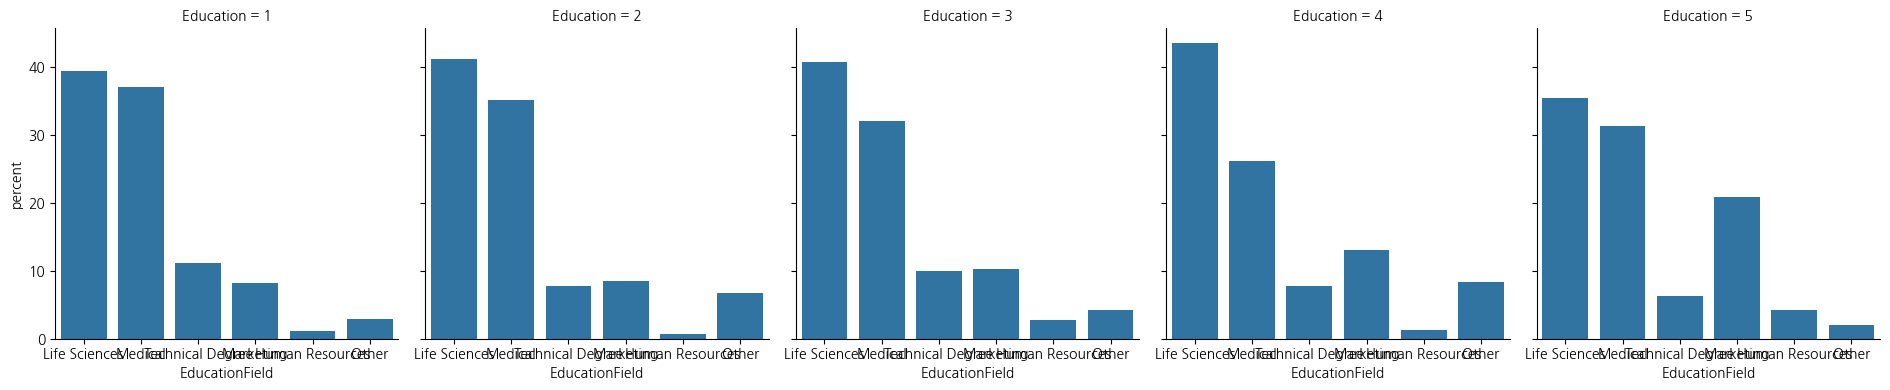

In [149]:
edu = sns.FacetGrid(df_edu, col="Education", height=4, aspect=.95)
edu.map(sns.barplot, "EducationField", "percent", order=["Life Sciences", "Medical", "Technical Degree", "Marketing", "Human Resources", "Other"])

C:\Users\kelly\AppData\Local\Temp\ipykernel_33780\3654970912.py:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_edu_y['percent'] = df_edu_y.groupby('EducationField')['counts'].apply(lambda x: 100 * x / float(x.sum()))
C:\Users\kelly\AppData\Local\Temp\ipykernel_33780\3654970912.py:13: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

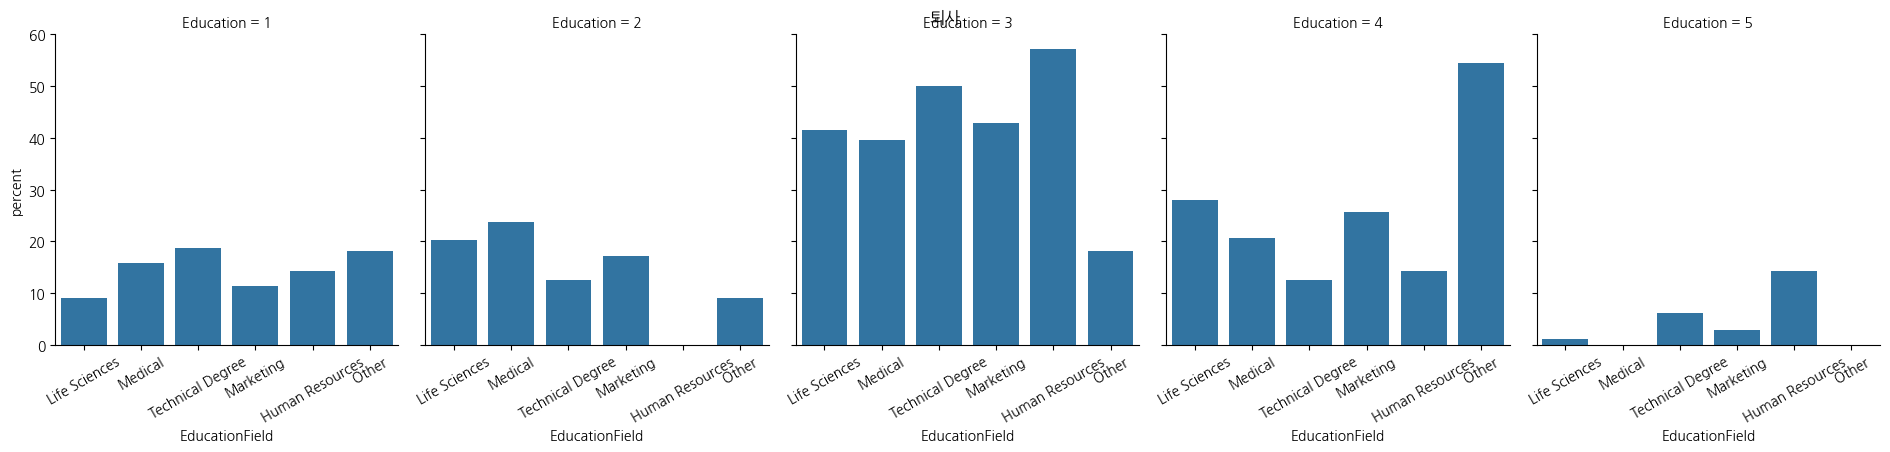

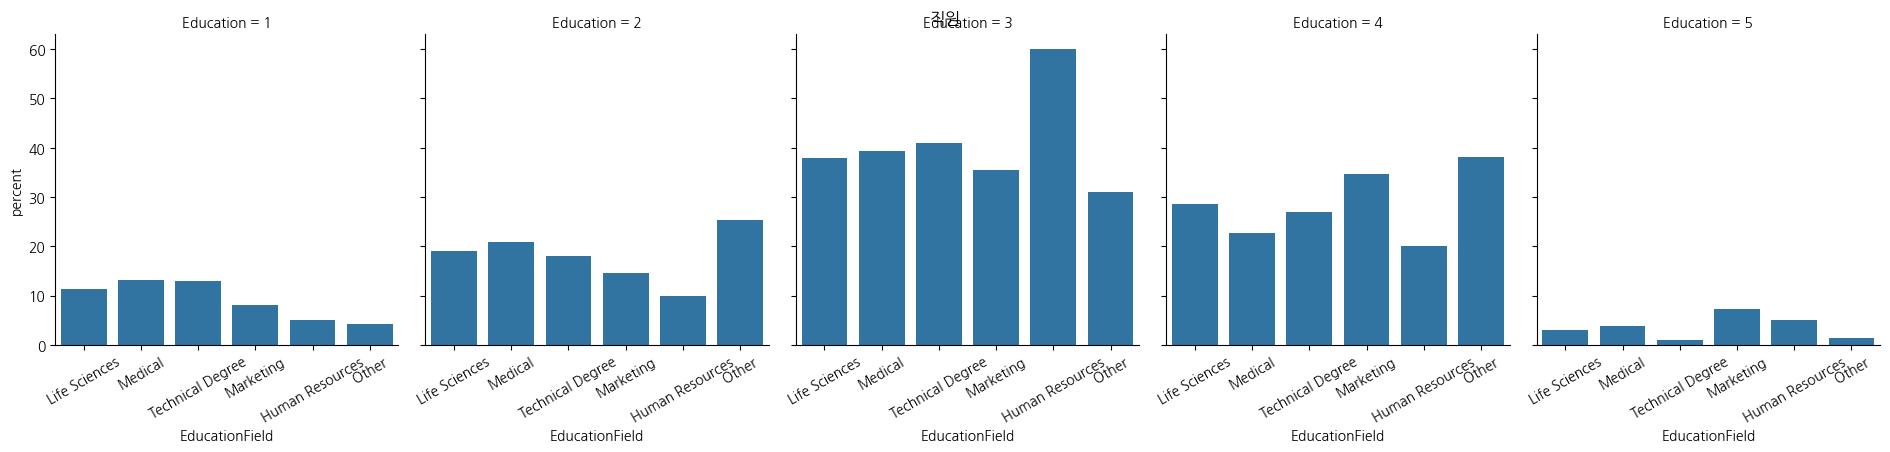

In [158]:
# Attrition yes와 no 경우 나누어서

# EducationField와 Education의 상관관계
df_edu_y = df_es[df_es['Attrition']=='Yes'].groupby(['EducationField', 'Education']).size().reset_index(name='counts')

# EducationFIeld별로 Education의 비율 계산
df_edu_y['percent'] = df_edu_y.groupby('EducationField')['counts'].apply(lambda x: 100 * x / float(x.sum()))

# EducationField와 Education의 상관관계
df_edu_n = df_es[df_es['Attrition']=='No'].groupby(['EducationField', 'Education']).size().reset_index(name='counts')

# EducationFIeld별로 Education의 비율 계산
df_edu_n['percent'] = df_edu_n.groupby('EducationField')['counts'].apply(lambda x: 100 * x / float(x.sum()))

# 퇴사
edu_y = sns.FacetGrid(df_edu_y, col="Education", height=4, aspect=.95)
edu_y.map(sns.barplot, "EducationField", "percent", order=["Life Sciences", "Medical", "Technical Degree", "Marketing", "Human Resources", "Other"])

edu_y.fig.suptitle("퇴사", fontsize=12)
edu_y.set_xticklabels(rotation=30)

# 직원
edu_n = sns.FacetGrid(df_edu_n, col="Education", height=4, aspect=.95)
edu_n.map(sns.barplot, "EducationField", "percent", order=["Life Sciences", "Medical", "Technical Degree", "Marketing", "Human Resources", "Other"])

edu_n.fig.suptitle("직원", fontsize=12)
edu_n.set_xticklabels(rotation=30)

C:\Users\kelly\AppData\Local\Temp\ipykernel_33780\157610413.py:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_je_y['percent'] = df_je_y.groupby('JobRole')['counts'].apply(lambda x: 100 * x / float(x.sum()))
C:\Users\kelly\AppData\Local\Temp\ipykernel_33780\157610413.py:13: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .gro

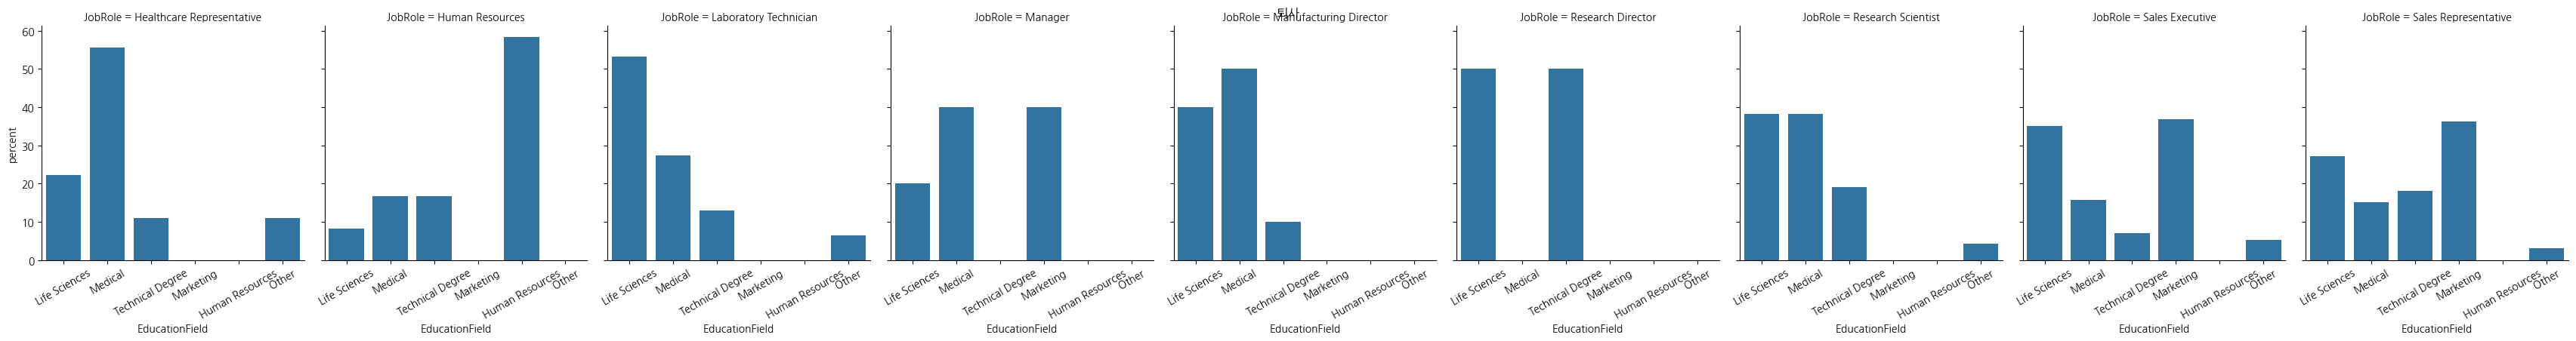

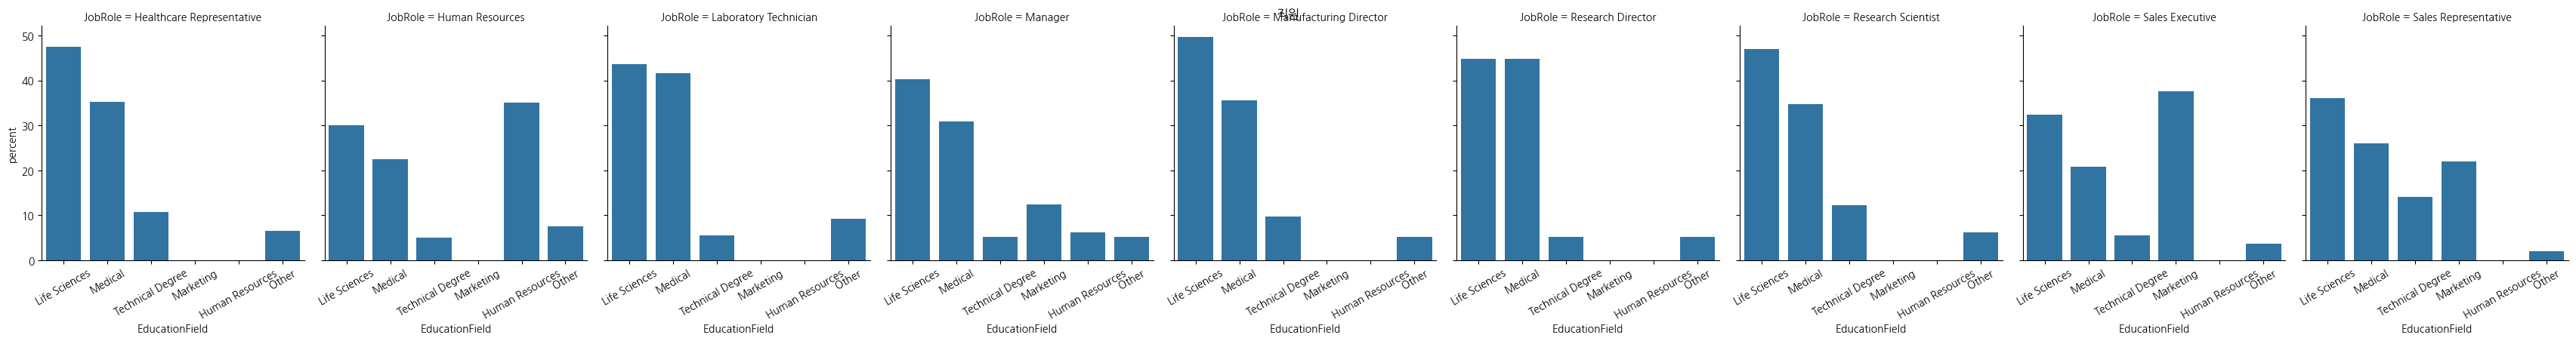

In [160]:
# Attrition yes와 no 경우 나누어서

# EducationField와 JobRole의 상관관계
df_je_y = df_es[df_es['Attrition']=='Yes'].groupby(['JobRole','EducationField']).size().reset_index(name='counts')

# JobRole별로 EducationField의 비율 계산
df_je_y['percent'] = df_je_y.groupby('JobRole')['counts'].apply(lambda x: 100 * x / float(x.sum()))

# EducationField와 JobRole의 상관관계
df_je_n = df_es[df_es['Attrition']=='No'].groupby(['JobRole','EducationField']).size().reset_index(name='counts')

# JobRole별로 EducationField의 비율 계산
df_je_n['percent'] = df_je_n.groupby('JobRole')['counts'].apply(lambda x: 100 * x / float(x.sum()))

# 퇴사
je_y = sns.FacetGrid(df_je_y, col="JobRole", height=4, aspect=.95)
je_y.map(sns.barplot, "EducationField", "percent", order=["Life Sciences", "Medical", "Technical Degree", "Marketing", "Human Resources", "Other"])

je_y.fig.suptitle("퇴사", fontsize=12)
je_y.set_xticklabels(rotation=30)

# 직원
je_n = sns.FacetGrid(df_je_n, col="JobRole", height=4, aspect=.95)
je_n.map(sns.barplot, "EducationField", "percent", order=["Life Sciences", "Medical", "Technical Degree", "Marketing", "Human Resources", "Other"])

je_n.fig.suptitle("직원", fontsize=12)
je_n.set_xticklabels(rotation=30)

In [161]:
# MaritalStatus와 Attrition 간의 연관성 확인
df_ma = df_es.groupby(['MaritalStatus', 'Attrition']).size().reset_index(name='counts')

# JobRole별로 Attrition의 비율 계산
df_ma['percent'] = df_ef.groupby('Attrition')['counts'].apply(lambda x: 100 * x / float(x.sum()))

df_ma

C:\Users\kelly\AppData\Local\Temp\ipykernel_33780\533657016.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_ma['percent'] = df_ef.groupby('Attrition')['counts'].apply(lambda x: 100 * x / float(x.sum()))


,MaritalStatus,Attrition,counts,percent
0,Divorced,No,294,1.622060
1,Divorced,Yes,33,2.953586
2,Married,No,589,41.930251
3,Married,Yes,84,37.552743
4,Single,No,350,10.056772
5,Single,Yes,120,14.767932


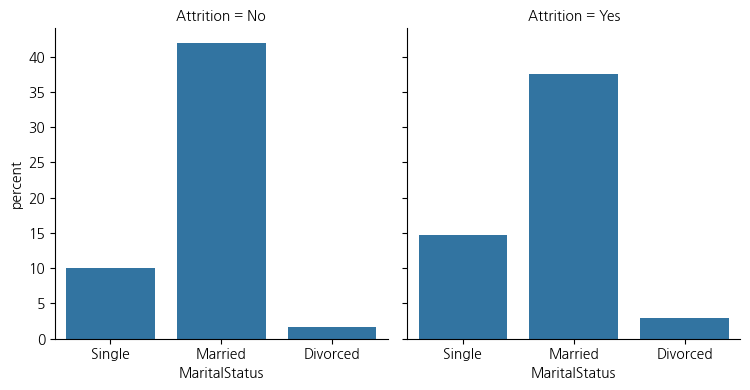

In [162]:
ma = sns.FacetGrid(df_ma, col="Attrition", height=4, aspect=.95)
ma.map(sns.barplot, "MaritalStatus", "percent", order=["Single", "Married", "Divorced"])

C:\Users\kelly\AppData\Local\Temp\ipykernel_33780\1383405673.py:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_jm_y['percent'] = df_jm_y.groupby('JobRole')['counts'].apply(lambda x: 100 * x / float(x.sum()))
C:\Users\kelly\AppData\Local\Temp\ipykernel_33780\1383405673.py:13: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .g

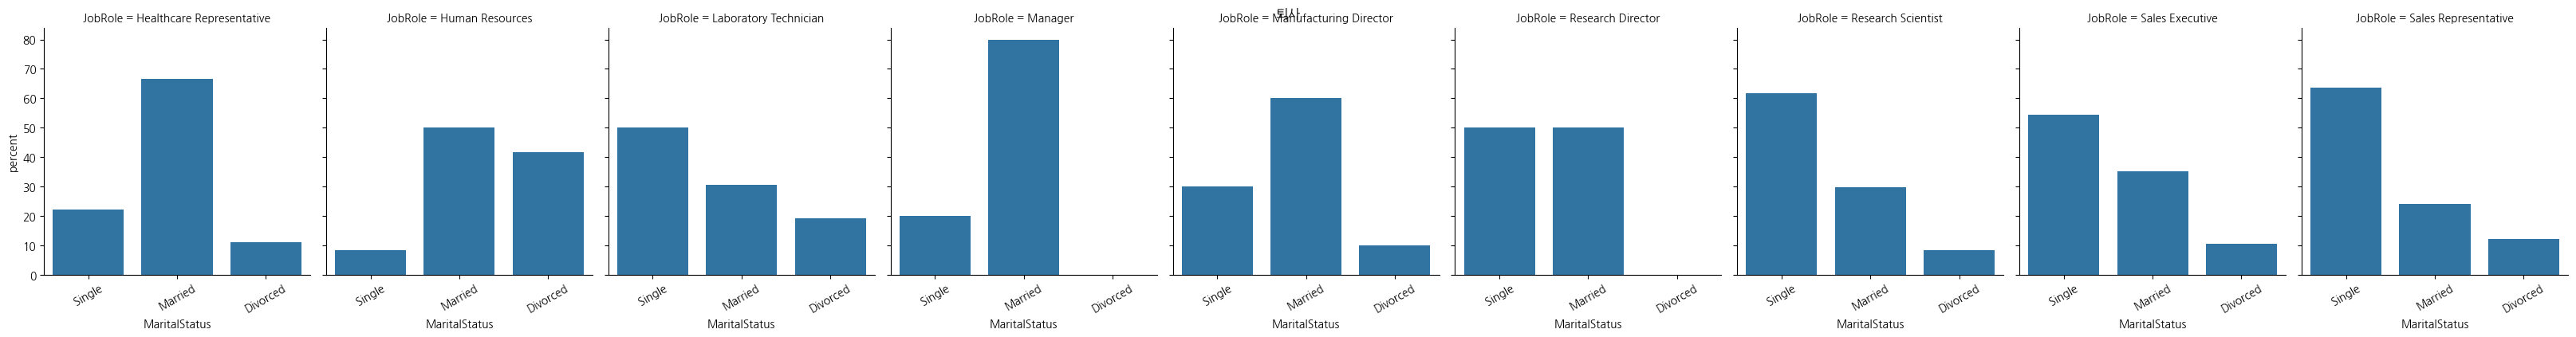

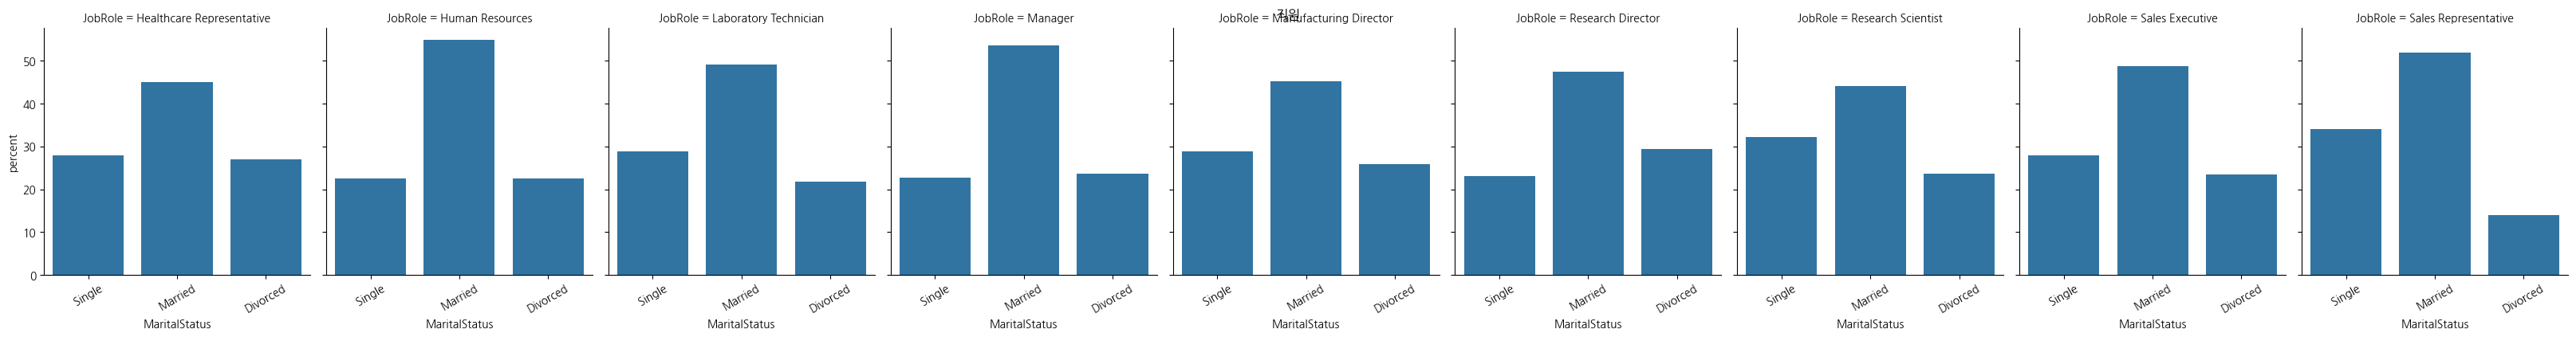

In [173]:
# Attrition yes와 no 경우 나누어서

# EducationField와 JobRole의 상관관계
df_jm_y = df_es[df_es['Attrition']=='Yes'].groupby(['JobRole','MaritalStatus']).size().reset_index(name='counts')

# JobRole별로 EducationField의 비율 계산
df_jm_y['percent'] = df_jm_y.groupby('JobRole')['counts'].apply(lambda x: 100 * x / float(x.sum()))

# EducationField와 JobRole의 상관관계
df_jm_n = df_es[df_es['Attrition']=='No'].groupby(['JobRole','MaritalStatus']).size().reset_index(name='counts')

# JobRole별로 EducationField의 비율 계산
df_jm_n['percent'] = df_jm_n.groupby('JobRole')['counts'].apply(lambda x: 100 * x / float(x.sum()))

# 퇴사
jm_y = sns.FacetGrid(df_jm_y, col="JobRole", height=4, aspect=.9)
jm_y.map(sns.barplot, "MaritalStatus", "percent", order=["Single", "Married", "Divorced"])

jm_y.fig.suptitle("퇴사", fontsize=12)
jm_y.set_xticklabels(rotation=30)

# 직원
jm_n = sns.FacetGrid(df_jm_n, col="JobRole", height=4, aspect=.9)
jm_n.map(sns.barplot, "MaritalStatus", "percent", order=["Single", "Married", "Divorced"])

jm_n.fig.suptitle("직원", fontsize=12)
jm_n.set_xticklabels(rotation=30)

In [174]:
# Age별로도 보고 싶은데, 나이대 세연님께서 만드신 매개변수로...?

C:\Users\kelly\AppData\Local\Temp\ipykernel_33780\3658631511.py:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_tm_y['percent'] = df_tm_y.groupby('MaritalStatus')['counts'].apply(lambda x: 100 * x / float(x.sum()))
C:\Users\kelly\AppData\Local\Temp\ipykernel_33780\3658631511.py:13: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	

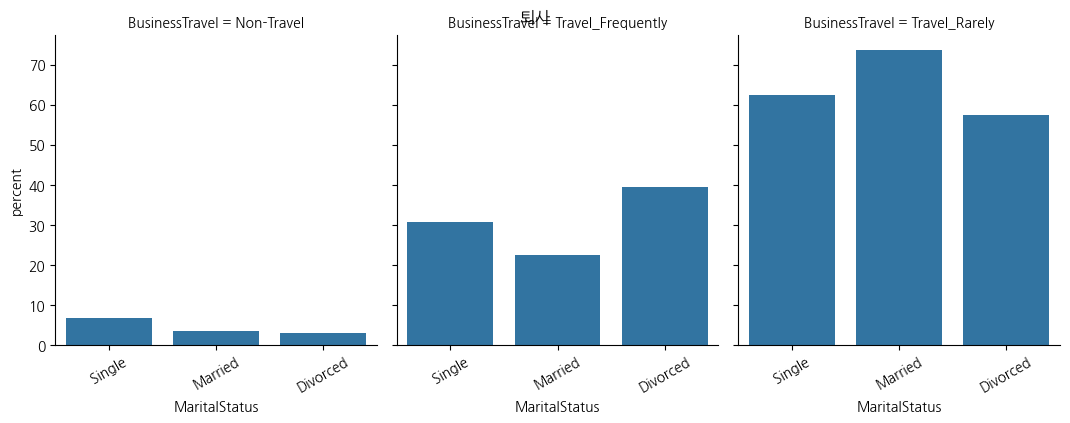

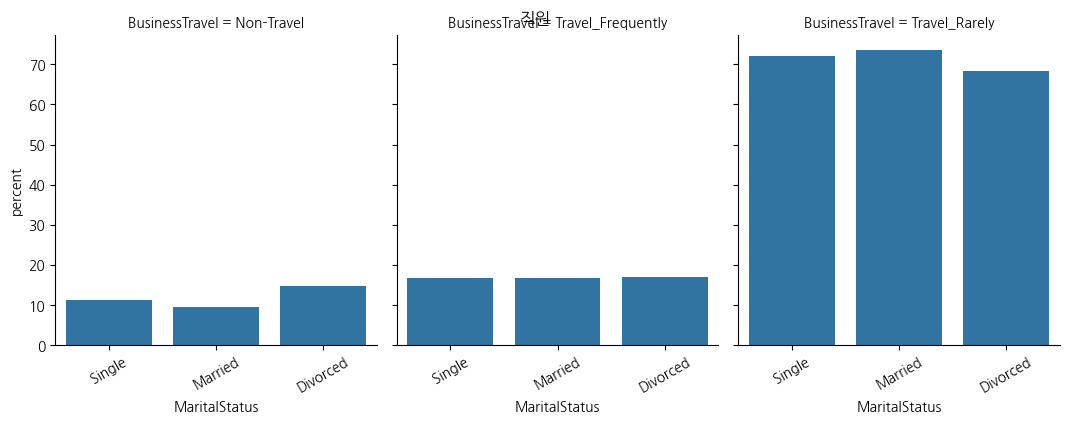

In [180]:
# Attrition yes와 no 경우 나누어서

# MarritalStatus와 BusinessTravel의 상관관계
df_tm_y = df_es[df_es['Attrition']=='Yes'].groupby(['BusinessTravel','MaritalStatus']).size().reset_index(name='counts')

# JobRole별로 EducationField의 비율 계산
df_tm_y['percent'] = df_tm_y.groupby('MaritalStatus')['counts'].apply(lambda x: 100 * x / float(x.sum()))

# EducationField와 JobRole의 상관관계
df_tm_n = df_es[df_es['Attrition']=='No'].groupby(['BusinessTravel','MaritalStatus']).size().reset_index(name='counts')

# JobRole별로 EducationField의 비율 계산
df_tm_n['percent'] = df_tm_n.groupby('MaritalStatus')['counts'].apply(lambda x: 100 * x / float(x.sum()))

# 퇴사
tm_y = sns.FacetGrid(df_tm_y, col="BusinessTravel", height=4, aspect=.9)
tm_y.map(sns.barplot, "MaritalStatus", "percent", order=["Single", "Married", "Divorced"])

tm_y.fig.suptitle("퇴사", fontsize=12)
tm_y.set_xticklabels(rotation=30)

# 직원
tm_n = sns.FacetGrid(df_tm_n, col="BusinessTravel", height=4, aspect=.9)
tm_n.map(sns.barplot, "MaritalStatus", "percent", order=["Single", "Married", "Divorced"])

tm_n.fig.suptitle("직원", fontsize=12)
tm_n.set_xticklabels(rotation=30)

# 결혼여부에 따른 색깔 추가하기!!!!

C:\Users\kelly\AppData\Local\Temp\ipykernel_33780\2501049523.py:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_tm_y['percent'] = df_tm_y.groupby('BusinessTravel')['counts'].apply(lambda x: 100 * x / float(x.sum()))
C:\Users\kelly\AppData\Local\Temp\ipykernel_33780\2501049523.py:13: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 



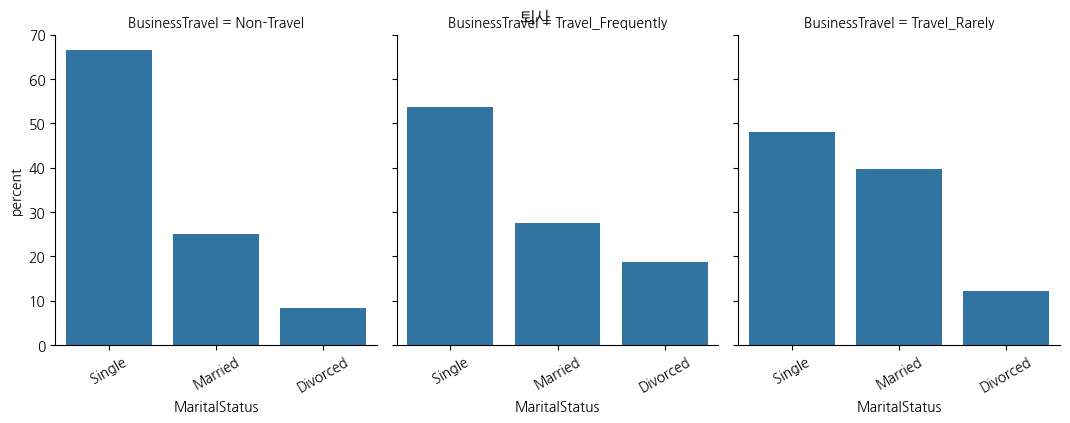

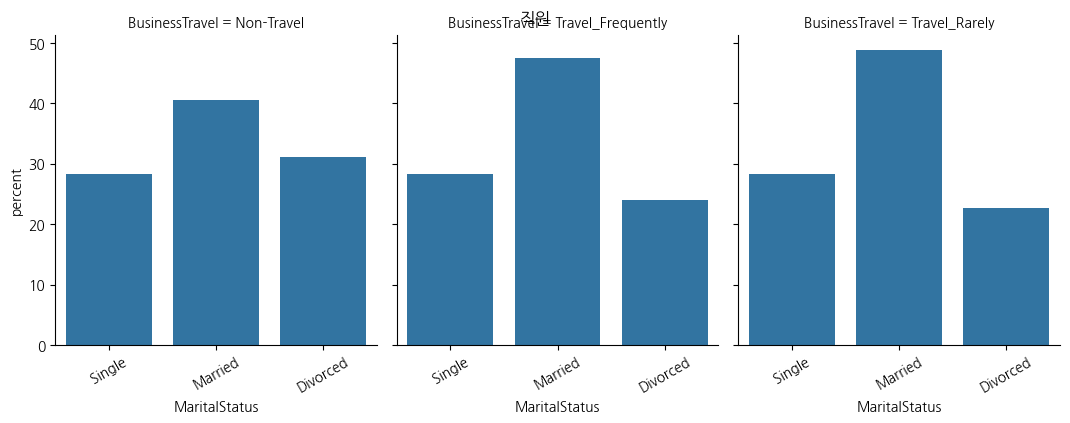

In [181]:
# Attrition yes와 no 경우 나누어서

# MarritalStatus와 BusinessTravel의 상관관계
df_tm_y = df_es[df_es['Attrition']=='Yes'].groupby(['BusinessTravel','MaritalStatus']).size().reset_index(name='counts')

# JobRole별로 EducationField의 비율 계산
df_tm_y['percent'] = df_tm_y.groupby('BusinessTravel')['counts'].apply(lambda x: 100 * x / float(x.sum()))

# EducationField와 JobRole의 상관관계
df_tm_n = df_es[df_es['Attrition']=='No'].groupby(['BusinessTravel','MaritalStatus']).size().reset_index(name='counts')

# JobRole별로 EducationField의 비율 계산
df_tm_n['percent'] = df_tm_n.groupby('BusinessTravel')['counts'].apply(lambda x: 100 * x / float(x.sum()))

# 퇴사
tm_y = sns.FacetGrid(df_tm_y, col="BusinessTravel", height=4, aspect=.9)
tm_y.map(sns.barplot, "MaritalStatus", "percent", order=["Single", "Married", "Divorced"])

tm_y.fig.suptitle("퇴사", fontsize=12)
tm_y.set_xticklabels(rotation=30)

# 직원
tm_n = sns.FacetGrid(df_tm_n, col="BusinessTravel", height=4, aspect=.9)
tm_n.map(sns.barplot, "MaritalStatus", "percent", order=["Single", "Married", "Divorced"])

tm_n.fig.suptitle("직원", fontsize=12)
tm_n.set_xticklabels(rotation=30)